# Package import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import random
import timeit
import sklearn
import sklearn.model_selection
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import string
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
random.seed(9001) # For Reproducibility of Results
%matplotlib inline

pd.set_option('display.max_rows', 300)

# Data Load

In [2]:
#NOMIS - CENSUS DATA - DIMENSIONS
population = pd.read_csv('postcodeSector/populationCount.csv', skiprows=8) # 8039*8
ethnicMinority = pd.read_csv('postcodeSector/Ethnic.csv', skiprows=8)  # 8039*96
ageStructure = pd.read_csv('postcodeSector/ageStructure.csv', skiprows=8) #8039*20
relationalSituation = pd.read_csv('postcodeSector/relational.csv', skiprows=8) #8039*8
livingArrangements = pd.read_csv('postcodeSector/livingArrangements.csv', skiprows=8) #8039*9
householdComposition = pd.read_csv('postcodeSector/householdComposition.csv', skiprows=8) #8039*23
notInEmploymentDependencies = pd.read_csv('postcodeSector/notInEmploymentDependencies.csv', skiprows=8) #8039*10
loneParentDependencies = pd.read_csv('postcodeSector/loneParentDependencies.csv', skiprows=8)#8039*13
ethnicGroup = pd.read_csv('postcodeSector/ethnicGroup.csv', skiprows=8) #8039*25
industry = pd.read_csv('postcodeSector/industry.csv', skiprows=8)#8039*26
tenure = pd.read_csv('postcodeSector/tenure.csv', skiprows=8) #8039*8
hoursWorked = pd.read_csv('postcodeSector/hoursWorked.csv', skiprows=8) #8039*6
dwelling = pd.read_csv('postcodeSector/dwelling.csv', skiprows=8) #8039*5
englishProf = pd.read_csv('postcodeSector/englishProf.csv', skiprows=8) #8039*7
centralHeating = pd.read_csv('postcodeSector/centralHeating.csv', skiprows=8) #8039*9
passportHeld = pd.read_csv('postcodeSector/passportHeld.csv', skiprows=7) #8039*73
birthCountry = pd.read_csv('postcodeSector/birthCountry.csv', skiprows=8) #8039*9
religion = pd.read_csv('postcodeSector/religion.csv', skiprows=8) #8063*12
generalHealth = pd.read_csv('postcodeSector/generalHealth.csv', skiprows=8) #8039*7
yearLastWorked = pd.read_csv('postcodeSector/yearLastWorked.csv', skiprows=8) #8039*13
householdSize = pd.read_csv('postcodeSector/householdSize.csv', skiprows=8) #8039*10
carOrVanAvailability = pd.read_csv('postcodeSector/carOrVanAvailability.csv', skiprows=8) #8039*7
distanceTravelledtoWork = pd.read_csv('postcodeSector/distanceTravelledtoWork.csv', skiprows=8) #8039*14
methodofTraveltoWork = pd.read_csv('postcodeSector/methodofTraveltoWork.csv', skiprows=8) #8039*14
ageofArrival = pd.read_csv('postcodeSector/ageofArrival.csv', skiprows=8) #8039*19
lengthofResidence = pd.read_csv('postcodeSector/lengthofResidence.csv', skiprows=8) #8039*7
occupationType = pd.read_csv('postcodeSector/occupation.csv', skiprows=8) #8039*11
mainLanguage = pd.read_csv('postcodeSector/mainLanguage.csv', skiprows=8) #8039*105
bedrooms = pd.read_csv('postcodeSector/bedrooms.csv', skiprows=8) #8039*8
longTermDisability = pd.read_csv('postcodeSector/longTermDisability.csv', skiprows=8) #8039*5
economicActivity = pd.read_csv('postcodeSector/economicActivity.csv', skiprows=8) #8039*17
positionInCommunalEstablishment = pd.read_csv('postcodeSector/positionInCommunalEstablishment.csv', skiprows=8) #8039*5
accomType = pd.read_csv('postcodeSector/accomType.csv', skiprows=8) #8039*13
secondAddress = pd.read_csv('postcodeSector/secondAddress.csv', skiprows=8) #8039*6
formerIndustry = pd.read_csv('postcodeSector/formerIndustry.csv', skiprows=8) #8039*11
formerOccupation = pd.read_csv('postcodeSector/formerOccupation.csv', skiprows=8) #8039*12


religion = religion.drop(religion.index[-24:]) # line added due to notes at bottom of CSV

qualification = pd.read_csv('postcodeSector/qualification.csv', skiprows=8) #8039*14   # AS A PROPORTION ONLY 


# Set up classification problem

In [3]:
qualification.drop(qualification.columns[[1,2,3,4,5,7,8,9,10,11,12]], axis=1, inplace=True)
qualification = qualification.rename(index=str, columns={"Highest level of qualification: Level 4 qualifications and above": "target"})

In [4]:
qualification.quantile(0.7) # Check to see where 70 percent quartile is to setup class imbalance

target    33.2
Name: 0.7, dtype: float64

In [5]:
# Assign a 1 or a zero as a output depending on whether proportion of people have, or don't have a higher education degree
qualification['classification'] = np.where(qualification['target']>=33.2, 1, 0) 

#Check
values = qualification.groupby('classification').count()
values['perc']= values['target']/values['target'].sum()
values

postcode sector  target     perc
classification                                  
0                          5620    5620  0.69944
1                          2415    2415  0.30056

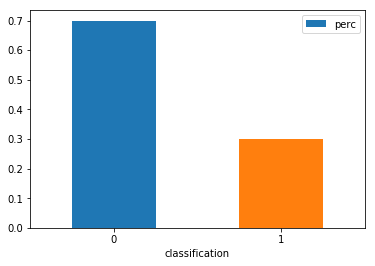

In [6]:
ax = values.plot.bar(y = 'perc',rot=0, )

# Combine datasets

In [7]:
###Merge different datasets
newDF = [population, ethnicMinority, ageStructure, relationalSituation, livingArrangements, householdComposition,notInEmploymentDependencies,loneParentDependencies,ethnicGroup,industry,tenure, hoursWorked,dwelling,englishProf,centralHeating,passportHeld,birthCountry,religion,generalHealth,yearLastWorked,householdSize,carOrVanAvailability,distanceTravelledtoWork,methodofTraveltoWork,ageofArrival,lengthofResidence,occupationType,mainLanguage,bedrooms,longTermDisability,economicActivity,positionInCommunalEstablishment,accomType,secondAddress,formerIndustry,formerOccupation,qualification]
newDF2 = pd.concat([i.set_index('postcode sector') for i in newDF],axis=1, join='outer')

In [8]:
#Check for dimensions
newDF2.shape

(8039, 735)

In [9]:
#drop rows without any information
newDF3 = newDF2.dropna()
newDF3.shape

(8035, 735)

In [10]:
#drop duplicate columns arising from merging...
newDF4 = newDF3.T.drop_duplicates().T

In [11]:
#remove spaces from variable names to allow access to columns
newDF4.columns = newDF4.columns.map(lambda x: x.replace(' ', '_'))

# Splitting data into Train, Test and Validation

In [12]:
featuresforTraining = newDF4.drop(['target','classification'], axis=1)

In [13]:
#Define function for splitting data
def validationTrainTestSplit(featuresforTraining, newDF4):#Splits data into 60-20-20 spilt 
    X_train1, X_test, y_train1, y_test = train_test_split(featuresforTraining, newDF4.classification, random_state=0, test_size=.2)
    X_train, X_validation, y_train,y_validation = train_test_split(X_train1, y_train1, random_state=0, test_size=.25)
    
    return X_train, X_test, X_validation, y_train, y_validation,y_test

In [14]:
#Execute function for splitting data
X_train, X_test, X_validation, y_train, y_validation,y_test = validationTrainTestSplit(featuresforTraining,newDF4)

In [15]:
#Check to see if 60-20-20 split correct
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(4821, 704)
(1607, 704)
(1607, 704)


In [16]:
y_train=y_train.astype('int')
y_test = y_test.astype('int')
y_validation = y_validation.astype('int')

# Feature Extraction Stage

In [17]:
#Scale the Data
scaler = StandardScaler()

In [18]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

In [20]:
X_validation

array([[-0.79660923, -0.77829327, -0.81143514, ..., -0.78895238,
        -0.83913703, -0.75380339],
       [-0.91335916, -0.84652084, -0.97453717, ..., -0.39513471,
         0.16146375,  0.57260026],
       [-0.62016365, -0.63001919, -0.60846371, ...,  2.72777031,
        -1.07978785,  0.86735662],
       ...,
       [ 2.64249489,  2.49770432,  2.77266736, ...,  1.45649924,
         1.10506828,  1.5072882 ],
       [ 1.67019517,  1.64405392,  1.68946274, ...,  1.24922678,
         3.89788438,  1.79428782],
       [-1.38141542, -1.37891074, -1.37892666, ..., -1.19658821,
        -1.11778535, -1.20757306]])

In [21]:
pca = PCA(70,random_state=123)

In [22]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=70, random_state=123,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
X_train_selected = pca.transform(X_train)
X_validation_selected = pca.transform(X_validation)
X_test_selected = pca.transform(X_test)

In [24]:
#check to see if reduction is correctly executed
print("The shape of X_train is:  ",  X_train.shape)
print("The shape of X_train_selected is:  ",  X_train_selected.shape)

The shape of X_train is:   (4821, 704)
The shape of X_train_selected is:   (4821, 70)


# Logistic Regression with Cross Validation

In [25]:
#Function for hyperparameter tuning
def hyperparameterTuneLogistic(i,j,X_train,y_train,X_test,y_test):
    print("        C =" + str(i) + "          Maximum Iterations =" + str(j))
#DEFINE MODEL
    logreg = LogisticRegression(C=i,max_iter=j,class_weight='balanced',random_state=123)
#TRAIN MODEL
    logreg.fit(X_train, y_train)
#Make Predictions
    y_pred = logreg.predict(X_test)
    
    
#PRINT METRICS
    print('CONFUSION MATRIX:   ')
    confusion_matrix2 = confusion_matrix(y_test, y_pred)
    print(confusion_matrix2)
    
    print('CLASSIFICATION REPORT:    ')
    print(classification_report(y_test, y_pred))

    print('ROC CURVE')
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    

    return

In [26]:
#HYPERPARAMETER TUNE
CValue = [0.001,0.0005,0.0001,0.01,0.5,0.1,0.5]
maxIterations = [50,100,150,200,250,300] 

        C =0.001          Maximum Iterations =50
CONFUSION MATRIX:   
[[855 274]
 [  9 469]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.76      0.86      1129
          1       0.63      0.98      0.77       478

avg / total       0.88      0.82      0.83      1607

ROC CURVE


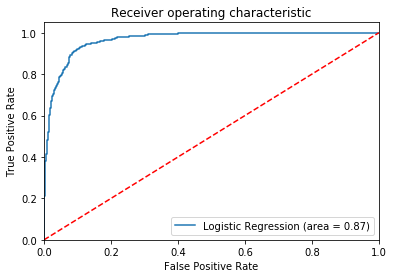

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =100
CONFUSION MATRIX:   
[[855 274]
 [  9 469]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.76      0.86      1129
          1       0.63      0.98      0.77       478

avg / total       0.88      0.82      0.83      1607

ROC CURVE


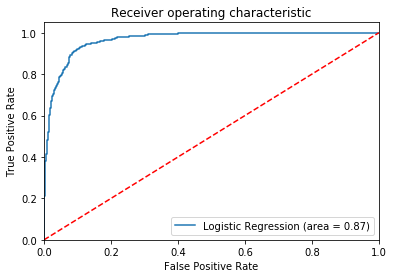

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =150
CONFUSION MATRIX:   
[[855 274]
 [  9 469]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.76      0.86      1129
          1       0.63      0.98      0.77       478

avg / total       0.88      0.82      0.83      1607

ROC CURVE


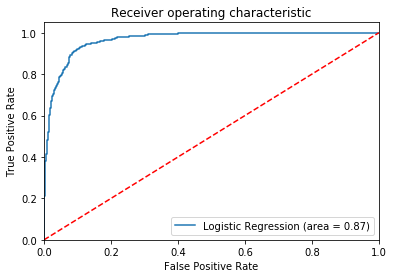

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =200
CONFUSION MATRIX:   
[[855 274]
 [  9 469]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.76      0.86      1129
          1       0.63      0.98      0.77       478

avg / total       0.88      0.82      0.83      1607

ROC CURVE


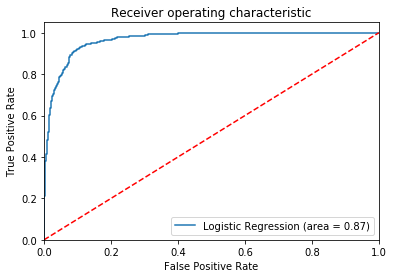

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =250
CONFUSION MATRIX:   
[[855 274]
 [  9 469]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.76      0.86      1129
          1       0.63      0.98      0.77       478

avg / total       0.88      0.82      0.83      1607

ROC CURVE


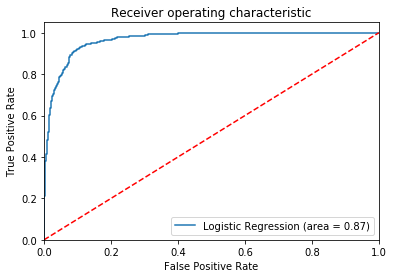

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =300
CONFUSION MATRIX:   
[[855 274]
 [  9 469]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.76      0.86      1129
          1       0.63      0.98      0.77       478

avg / total       0.88      0.82      0.83      1607

ROC CURVE


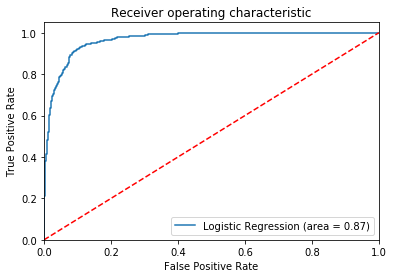

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =50
CONFUSION MATRIX:   
[[806 323]
 [ 10 468]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.71      0.83      1129
          1       0.59      0.98      0.74       478

avg / total       0.87      0.79      0.80      1607

ROC CURVE


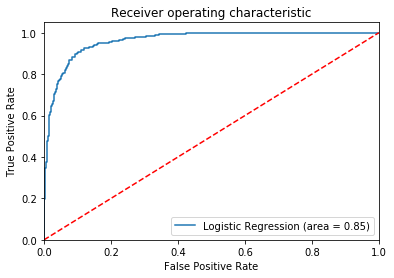

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =100
CONFUSION MATRIX:   
[[806 323]
 [ 10 468]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.71      0.83      1129
          1       0.59      0.98      0.74       478

avg / total       0.87      0.79      0.80      1607

ROC CURVE


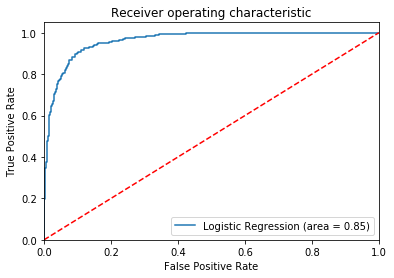

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =150
CONFUSION MATRIX:   
[[806 323]
 [ 10 468]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.71      0.83      1129
          1       0.59      0.98      0.74       478

avg / total       0.87      0.79      0.80      1607

ROC CURVE


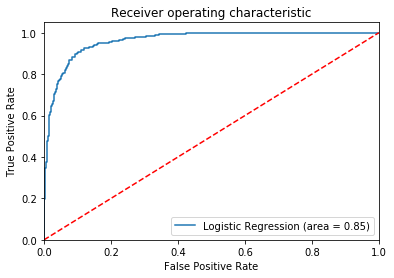

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =200
CONFUSION MATRIX:   
[[806 323]
 [ 10 468]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.71      0.83      1129
          1       0.59      0.98      0.74       478

avg / total       0.87      0.79      0.80      1607

ROC CURVE


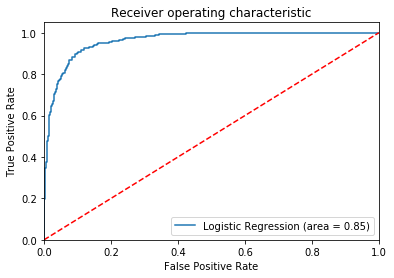

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =250
CONFUSION MATRIX:   
[[806 323]
 [ 10 468]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.71      0.83      1129
          1       0.59      0.98      0.74       478

avg / total       0.87      0.79      0.80      1607

ROC CURVE


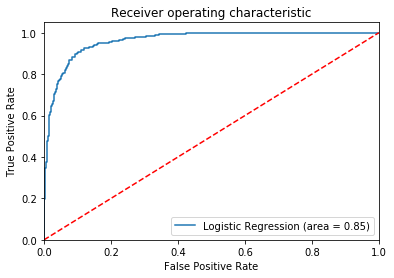

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =300
CONFUSION MATRIX:   
[[806 323]
 [ 10 468]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.71      0.83      1129
          1       0.59      0.98      0.74       478

avg / total       0.87      0.79      0.80      1607

ROC CURVE


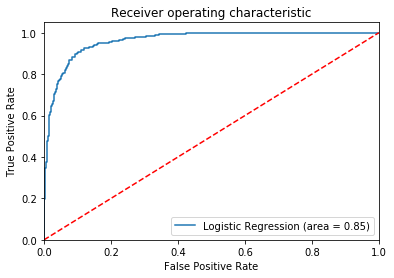

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =50
CONFUSION MATRIX:   
[[740 389]
 [ 17 461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.66      0.78      1129
          1       0.54      0.96      0.69       478

avg / total       0.85      0.75      0.76      1607

ROC CURVE


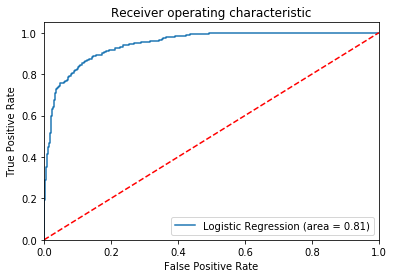

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =100
CONFUSION MATRIX:   
[[740 389]
 [ 17 461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.66      0.78      1129
          1       0.54      0.96      0.69       478

avg / total       0.85      0.75      0.76      1607

ROC CURVE


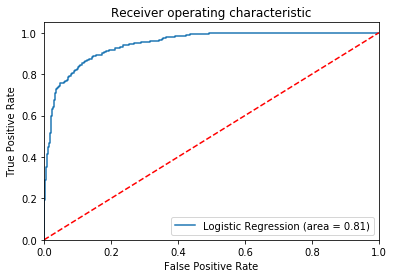

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =150
CONFUSION MATRIX:   
[[740 389]
 [ 17 461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.66      0.78      1129
          1       0.54      0.96      0.69       478

avg / total       0.85      0.75      0.76      1607

ROC CURVE


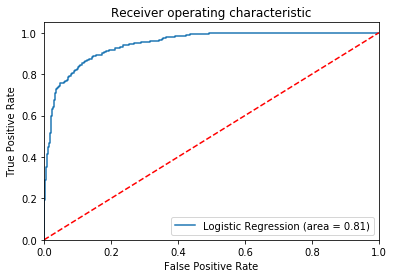

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =200
CONFUSION MATRIX:   
[[740 389]
 [ 17 461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.66      0.78      1129
          1       0.54      0.96      0.69       478

avg / total       0.85      0.75      0.76      1607

ROC CURVE


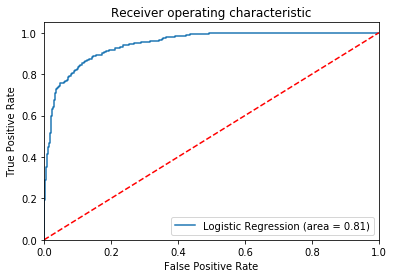

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =250
CONFUSION MATRIX:   
[[740 389]
 [ 17 461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.66      0.78      1129
          1       0.54      0.96      0.69       478

avg / total       0.85      0.75      0.76      1607

ROC CURVE


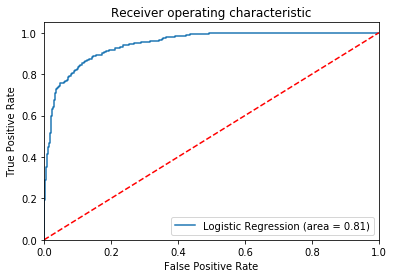

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =300
CONFUSION MATRIX:   
[[740 389]
 [ 17 461]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.66      0.78      1129
          1       0.54      0.96      0.69       478

avg / total       0.85      0.75      0.76      1607

ROC CURVE


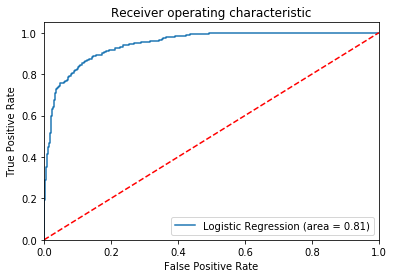

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =50
CONFUSION MATRIX:   
[[962 167]
 [ 14 464]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.85      0.91      1129
          1       0.74      0.97      0.84       478

avg / total       0.91      0.89      0.89      1607

ROC CURVE


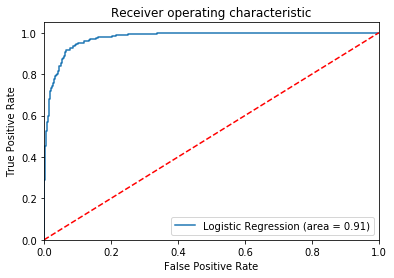

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =100
CONFUSION MATRIX:   
[[962 167]
 [ 14 464]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.85      0.91      1129
          1       0.74      0.97      0.84       478

avg / total       0.91      0.89      0.89      1607

ROC CURVE


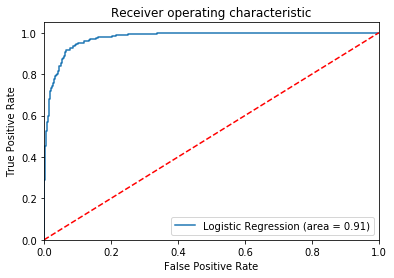

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =150
CONFUSION MATRIX:   
[[962 167]
 [ 14 464]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.85      0.91      1129
          1       0.74      0.97      0.84       478

avg / total       0.91      0.89      0.89      1607

ROC CURVE


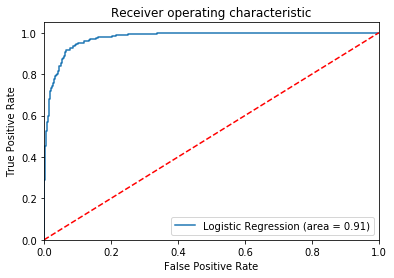

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =200
CONFUSION MATRIX:   
[[962 167]
 [ 14 464]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.85      0.91      1129
          1       0.74      0.97      0.84       478

avg / total       0.91      0.89      0.89      1607

ROC CURVE


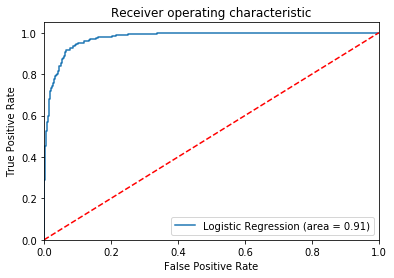

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =250
CONFUSION MATRIX:   
[[962 167]
 [ 14 464]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.85      0.91      1129
          1       0.74      0.97      0.84       478

avg / total       0.91      0.89      0.89      1607

ROC CURVE


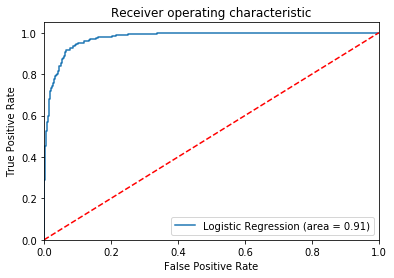

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =300
CONFUSION MATRIX:   
[[962 167]
 [ 14 464]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.85      0.91      1129
          1       0.74      0.97      0.84       478

avg / total       0.91      0.89      0.89      1607

ROC CURVE


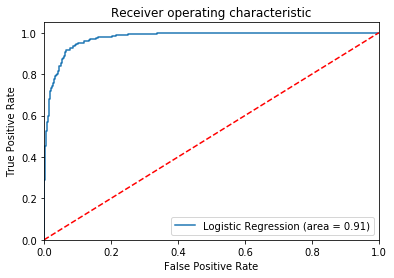

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =50
CONFUSION MATRIX:   
[[1020  109]
 [  25  453]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.90      0.94      1129
          1       0.81      0.95      0.87       478

avg / total       0.93      0.92      0.92      1607

ROC CURVE


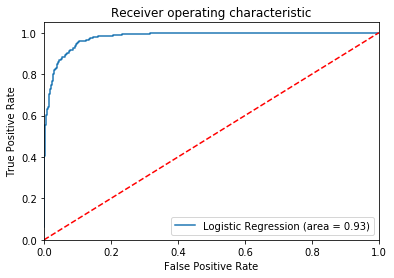

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =100
CONFUSION MATRIX:   
[[1020  109]
 [  25  453]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.90      0.94      1129
          1       0.81      0.95      0.87       478

avg / total       0.93      0.92      0.92      1607

ROC CURVE


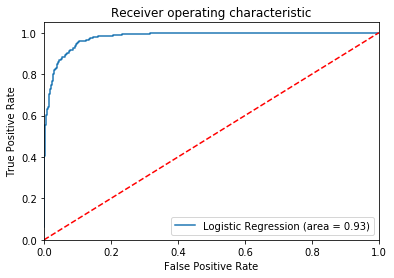

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =150
CONFUSION MATRIX:   
[[1020  109]
 [  25  453]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.90      0.94      1129
          1       0.81      0.95      0.87       478

avg / total       0.93      0.92      0.92      1607

ROC CURVE


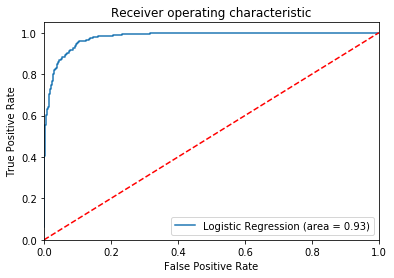

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =200
CONFUSION MATRIX:   
[[1020  109]
 [  25  453]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.90      0.94      1129
          1       0.81      0.95      0.87       478

avg / total       0.93      0.92      0.92      1607

ROC CURVE


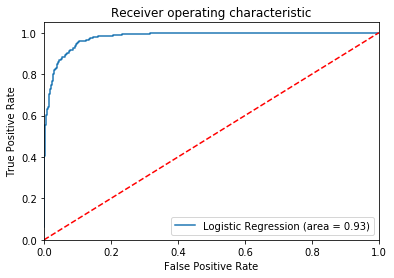

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =250
CONFUSION MATRIX:   
[[1020  109]
 [  25  453]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.90      0.94      1129
          1       0.81      0.95      0.87       478

avg / total       0.93      0.92      0.92      1607

ROC CURVE


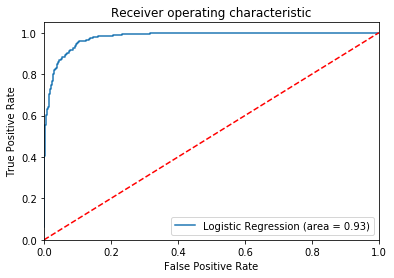

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =300
CONFUSION MATRIX:   
[[1020  109]
 [  25  453]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.90      0.94      1129
          1       0.81      0.95      0.87       478

avg / total       0.93      0.92      0.92      1607

ROC CURVE


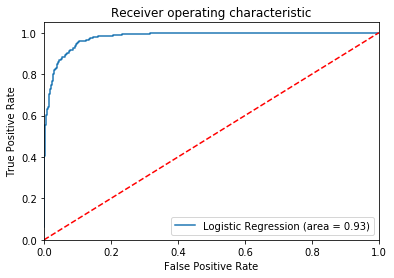

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =50
CONFUSION MATRIX:   
[[1009  120]
 [  20  458]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.89      0.94      1129
          1       0.79      0.96      0.87       478

avg / total       0.92      0.91      0.91      1607

ROC CURVE


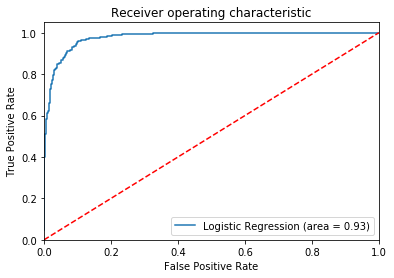

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =100
CONFUSION MATRIX:   
[[1009  120]
 [  20  458]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.89      0.94      1129
          1       0.79      0.96      0.87       478

avg / total       0.92      0.91      0.91      1607

ROC CURVE


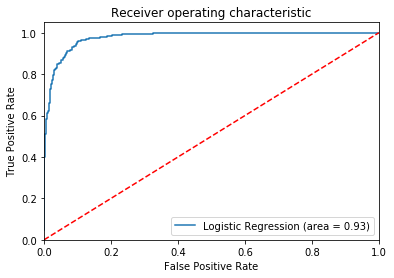

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =150
CONFUSION MATRIX:   
[[1009  120]
 [  20  458]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.89      0.94      1129
          1       0.79      0.96      0.87       478

avg / total       0.92      0.91      0.91      1607

ROC CURVE


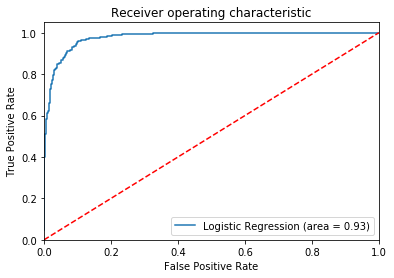

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =200
CONFUSION MATRIX:   
[[1009  120]
 [  20  458]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.89      0.94      1129
          1       0.79      0.96      0.87       478

avg / total       0.92      0.91      0.91      1607

ROC CURVE


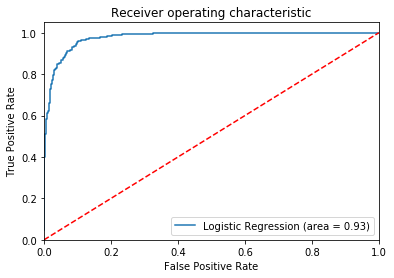

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =250
CONFUSION MATRIX:   
[[1009  120]
 [  20  458]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.89      0.94      1129
          1       0.79      0.96      0.87       478

avg / total       0.92      0.91      0.91      1607

ROC CURVE


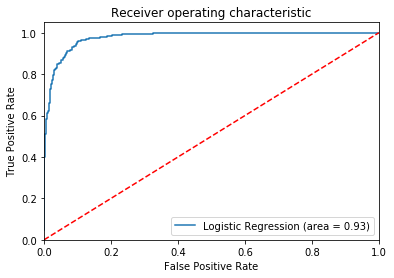

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =300
CONFUSION MATRIX:   
[[1009  120]
 [  20  458]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.89      0.94      1129
          1       0.79      0.96      0.87       478

avg / total       0.92      0.91      0.91      1607

ROC CURVE


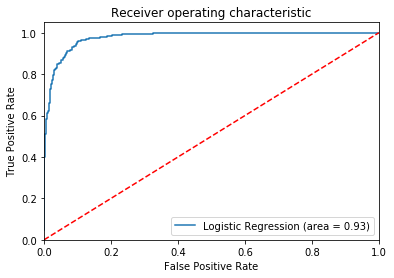

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =50
CONFUSION MATRIX:   
[[1020  109]
 [  25  453]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.90      0.94      1129
          1       0.81      0.95      0.87       478

avg / total       0.93      0.92      0.92      1607

ROC CURVE


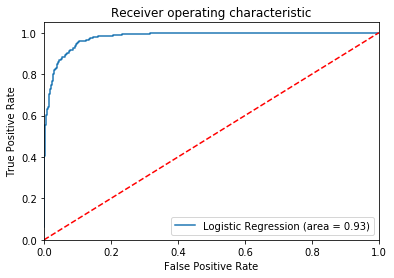

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =100
CONFUSION MATRIX:   
[[1020  109]
 [  25  453]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.90      0.94      1129
          1       0.81      0.95      0.87       478

avg / total       0.93      0.92      0.92      1607

ROC CURVE


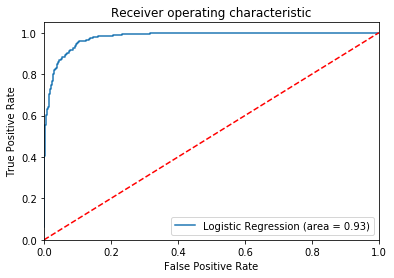

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =150
CONFUSION MATRIX:   
[[1020  109]
 [  25  453]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.90      0.94      1129
          1       0.81      0.95      0.87       478

avg / total       0.93      0.92      0.92      1607

ROC CURVE


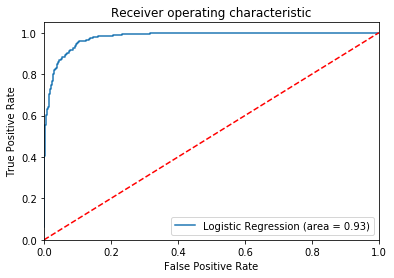

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =200
CONFUSION MATRIX:   
[[1020  109]
 [  25  453]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.90      0.94      1129
          1       0.81      0.95      0.87       478

avg / total       0.93      0.92      0.92      1607

ROC CURVE


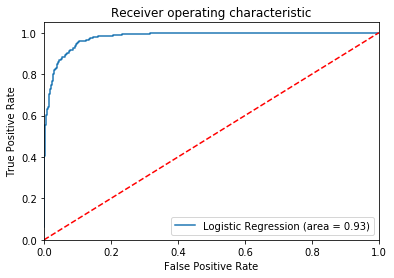

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =250
CONFUSION MATRIX:   
[[1020  109]
 [  25  453]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.90      0.94      1129
          1       0.81      0.95      0.87       478

avg / total       0.93      0.92      0.92      1607

ROC CURVE


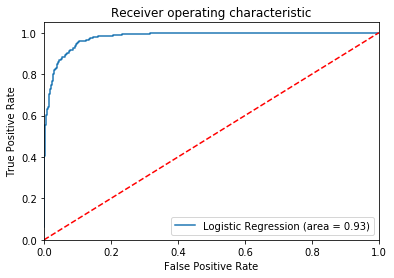

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =300
CONFUSION MATRIX:   
[[1020  109]
 [  25  453]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.90      0.94      1129
          1       0.81      0.95      0.87       478

avg / total       0.93      0.92      0.92      1607

ROC CURVE


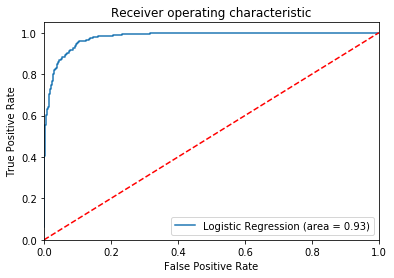

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
9.337568305308665


In [27]:
#RUN LOOP OF ALL PARAMETERS
start_time = timeit.default_timer()
for i in CValue:
    for j in maxIterations:
        hyperparameterTuneLogistic(i,j,X_train_selected, y_train, X_validation_selected, y_validation)
elapsed = timeit.default_timer() - start_time
print(elapsed)

### Logistic Regression

###### OPTIMAL PARAMETERS
###### C = 0.5    max_iter = 150
###### Execution time (9.338 seconds)


# Random Forest  with Cross Validation

In [28]:
#HYPER PARAMETER TUNE
Estimators = [10,30,50,80,100,]
maxFeatures = ["auto","sqrt","log2", None ]
maxDepth = [1,10,50,100,150,None]

In [29]:
def hyperparameterTuneRandomForest(i,j,k,X_train,y_train,X_test,y_test):
    print("  Estimators =" + str(i) + "          Maximum Features =" + str(j) + "         Maximum Depth =" + str(k) )
# initiate model
    RandomForest = RandomForestClassifier(n_estimators=i, max_features = j, max_depth = k ,random_state=123, class_weight = 'balanced_subsample')

# train model
    RandomForest.fit(X_train, y_train)

#make predictions
    
    y_pred = RandomForest.predict(X_test)

#print metrics
    print('CONFUSION MATRIX:   ')
    confusion_matrix2 = confusion_matrix(y_test, y_pred)
    print(confusion_matrix2)
    
    print('CLASSIFICATION REPORT:    ')
    print(classification_report(y_test, y_pred))

    print('ROC CURVE')
    logit_roc_auc = roc_auc_score(y_test, RandomForest.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, RandomForest.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    return

  Estimators =10          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[806 323]
 [151 327]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.84      0.71      0.77      1129
          1       0.50      0.68      0.58       478

avg / total       0.74      0.71      0.72      1607

ROC CURVE


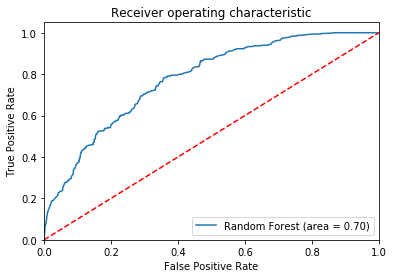

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[1046   83]
 [ 134  344]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.93      0.91      1129
          1       0.81      0.72      0.76       478

avg / total       0.86      0.86      0.86      1607

ROC CURVE


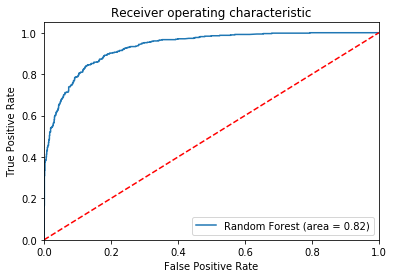

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[1094   35]
 [ 183  295]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.97      0.91      1129
          1       0.89      0.62      0.73       478

avg / total       0.87      0.86      0.86      1607

ROC CURVE


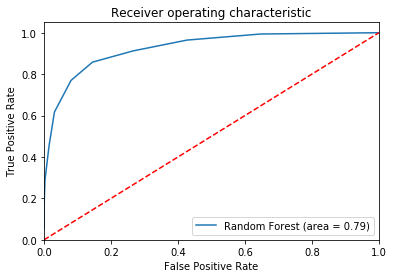

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[1094   35]
 [ 183  295]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.97      0.91      1129
          1       0.89      0.62      0.73       478

avg / total       0.87      0.86      0.86      1607

ROC CURVE


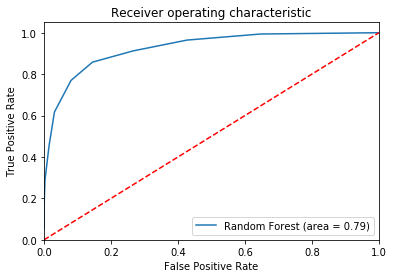

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[1094   35]
 [ 183  295]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.97      0.91      1129
          1       0.89      0.62      0.73       478

avg / total       0.87      0.86      0.86      1607

ROC CURVE


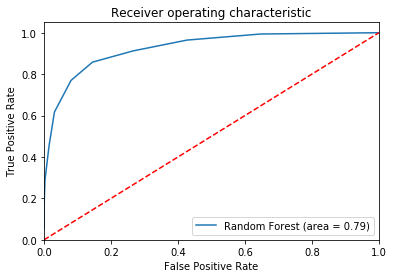

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[1094   35]
 [ 183  295]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.97      0.91      1129
          1       0.89      0.62      0.73       478

avg / total       0.87      0.86      0.86      1607

ROC CURVE


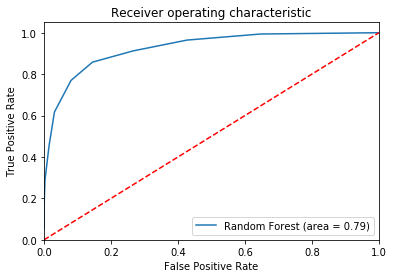

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[806 323]
 [151 327]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.84      0.71      0.77      1129
          1       0.50      0.68      0.58       478

avg / total       0.74      0.71      0.72      1607

ROC CURVE


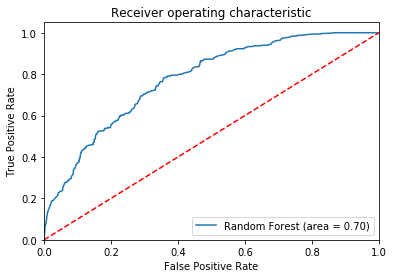

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[1046   83]
 [ 134  344]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.93      0.91      1129
          1       0.81      0.72      0.76       478

avg / total       0.86      0.86      0.86      1607

ROC CURVE


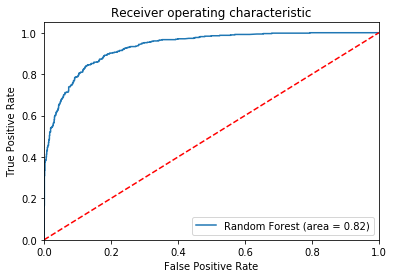

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[1094   35]
 [ 183  295]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.97      0.91      1129
          1       0.89      0.62      0.73       478

avg / total       0.87      0.86      0.86      1607

ROC CURVE


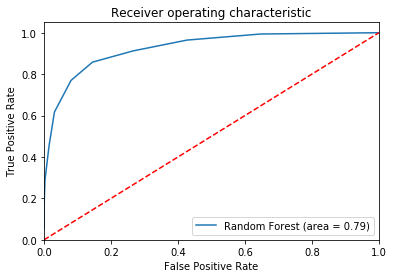

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[1094   35]
 [ 183  295]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.97      0.91      1129
          1       0.89      0.62      0.73       478

avg / total       0.87      0.86      0.86      1607

ROC CURVE


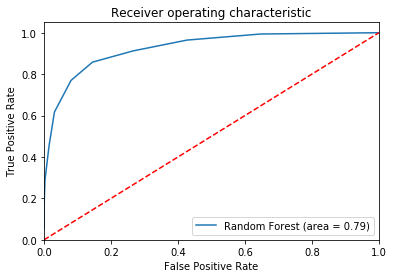

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[1094   35]
 [ 183  295]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.97      0.91      1129
          1       0.89      0.62      0.73       478

avg / total       0.87      0.86      0.86      1607

ROC CURVE


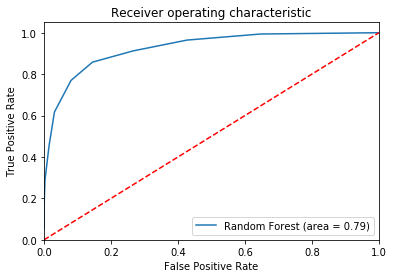

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[1094   35]
 [ 183  295]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.97      0.91      1129
          1       0.89      0.62      0.73       478

avg / total       0.87      0.86      0.86      1607

ROC CURVE


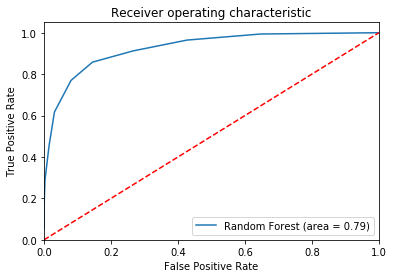

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[804 325]
 [153 325]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.84      0.71      0.77      1129
          1       0.50      0.68      0.58       478

avg / total       0.74      0.70      0.71      1607

ROC CURVE


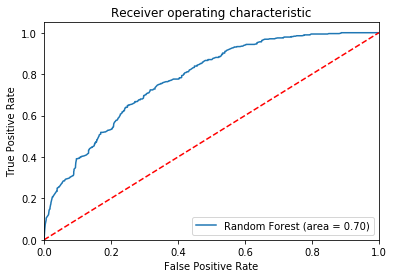

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[1026  103]
 [ 119  359]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.91      0.90      1129
          1       0.78      0.75      0.76       478

avg / total       0.86      0.86      0.86      1607

ROC CURVE


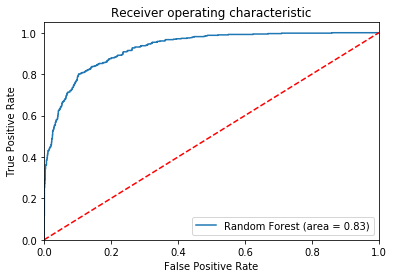

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[1105   24]
 [ 214  264]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.84      0.98      0.90      1129
          1       0.92      0.55      0.69       478

avg / total       0.86      0.85      0.84      1607

ROC CURVE


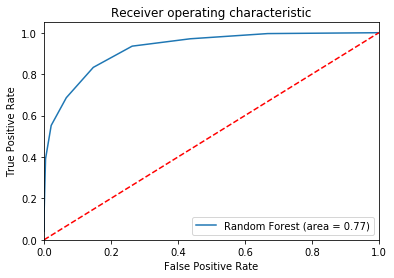

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[1105   24]
 [ 214  264]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.84      0.98      0.90      1129
          1       0.92      0.55      0.69       478

avg / total       0.86      0.85      0.84      1607

ROC CURVE


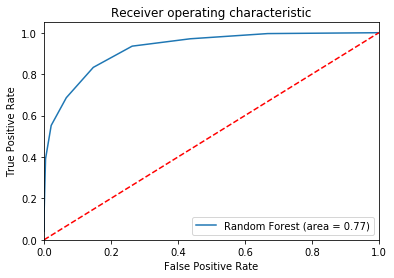

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[1105   24]
 [ 214  264]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.84      0.98      0.90      1129
          1       0.92      0.55      0.69       478

avg / total       0.86      0.85      0.84      1607

ROC CURVE


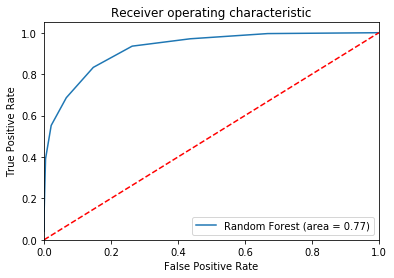

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[1105   24]
 [ 214  264]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.84      0.98      0.90      1129
          1       0.92      0.55      0.69       478

avg / total       0.86      0.85      0.84      1607

ROC CURVE


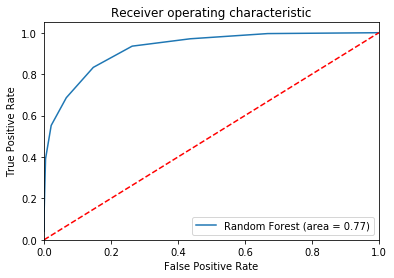

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[858 271]
 [202 276]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      0.76      0.78      1129
          1       0.50      0.58      0.54       478

avg / total       0.72      0.71      0.71      1607

ROC CURVE


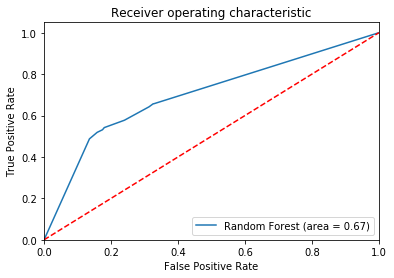

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[1046   83]
 [ 112  366]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.93      0.91      1129
          1       0.82      0.77      0.79       478

avg / total       0.88      0.88      0.88      1607

ROC CURVE


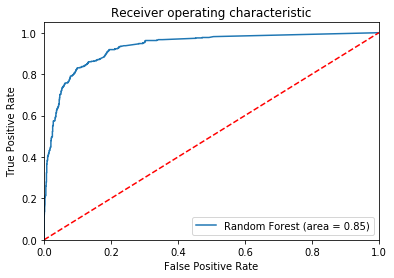

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[1076   53]
 [ 141  337]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.95      0.92      1129
          1       0.86      0.71      0.78       478

avg / total       0.88      0.88      0.88      1607

ROC CURVE


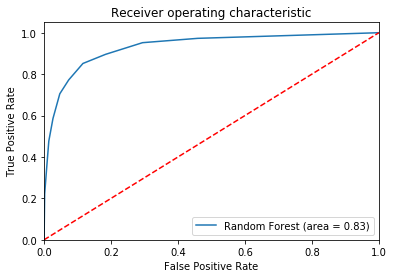

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[1076   53]
 [ 141  337]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.95      0.92      1129
          1       0.86      0.71      0.78       478

avg / total       0.88      0.88      0.88      1607

ROC CURVE


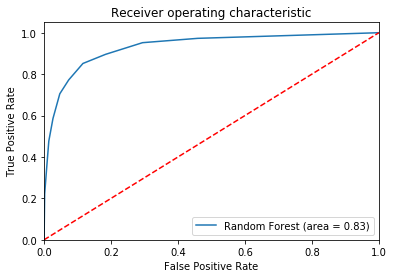

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[1076   53]
 [ 141  337]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.95      0.92      1129
          1       0.86      0.71      0.78       478

avg / total       0.88      0.88      0.88      1607

ROC CURVE


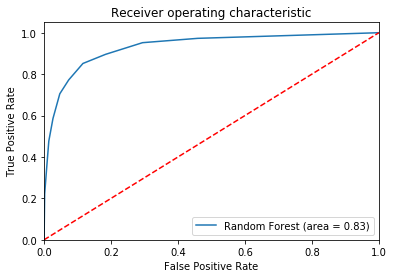

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[1076   53]
 [ 141  337]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.95      0.92      1129
          1       0.86      0.71      0.78       478

avg / total       0.88      0.88      0.88      1607

ROC CURVE


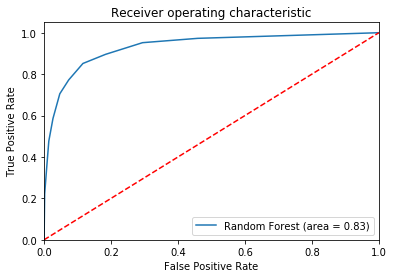

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[822 307]
 [118 360]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      0.73      0.79      1129
          1       0.54      0.75      0.63       478

avg / total       0.77      0.74      0.75      1607

ROC CURVE


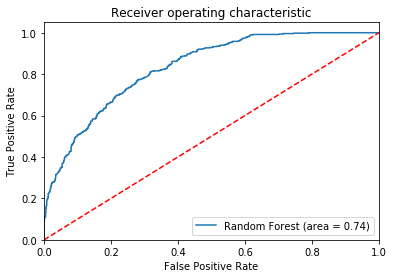

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[1063   66]
 [ 100  378]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.94      0.93      1129
          1       0.85      0.79      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


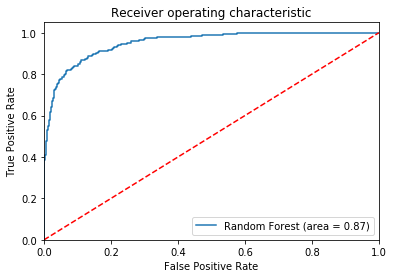

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[1103   26]
 [ 149  329]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.93      0.69      0.79       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


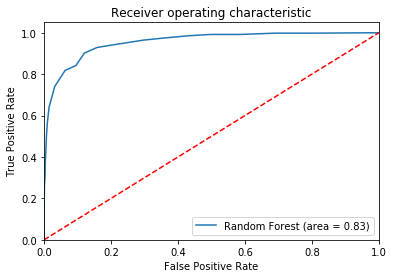

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[1103   26]
 [ 149  329]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.93      0.69      0.79       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


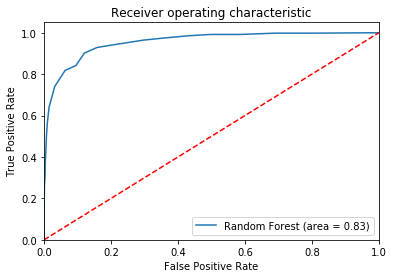

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[1103   26]
 [ 149  329]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.93      0.69      0.79       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


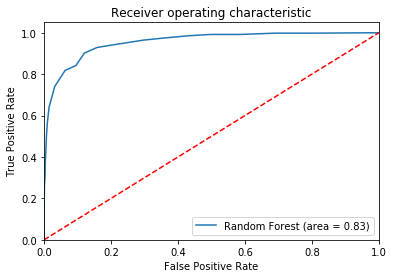

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[1103   26]
 [ 149  329]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.93      0.69      0.79       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


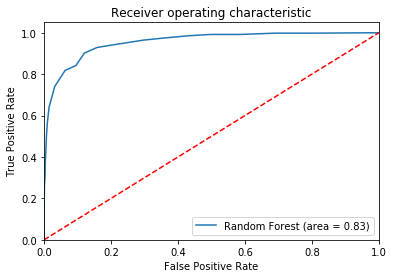

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[822 307]
 [118 360]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      0.73      0.79      1129
          1       0.54      0.75      0.63       478

avg / total       0.77      0.74      0.75      1607

ROC CURVE


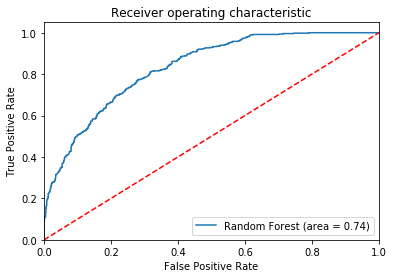

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[1063   66]
 [ 100  378]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.94      0.93      1129
          1       0.85      0.79      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


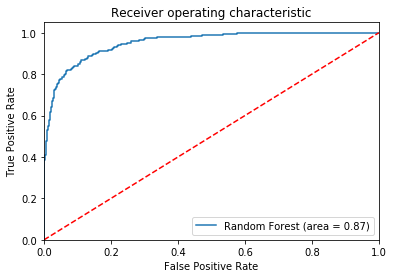

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[1103   26]
 [ 149  329]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.93      0.69      0.79       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


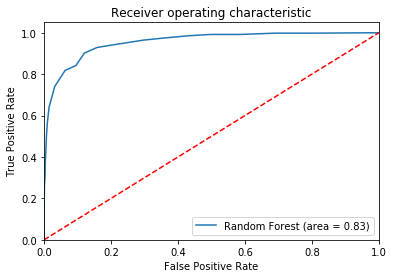

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[1103   26]
 [ 149  329]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.93      0.69      0.79       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


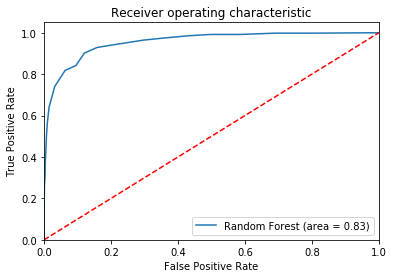

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[1103   26]
 [ 149  329]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.93      0.69      0.79       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


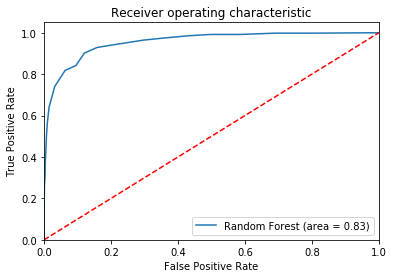

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[1103   26]
 [ 149  329]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.93      0.69      0.79       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


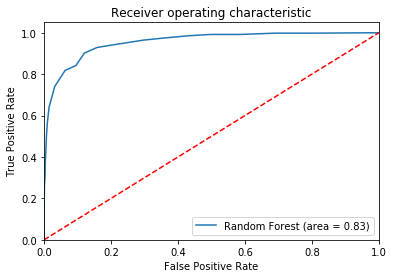

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[811 318]
 [117 361]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      0.72      0.79      1129
          1       0.53      0.76      0.62       478

avg / total       0.77      0.73      0.74      1607

ROC CURVE


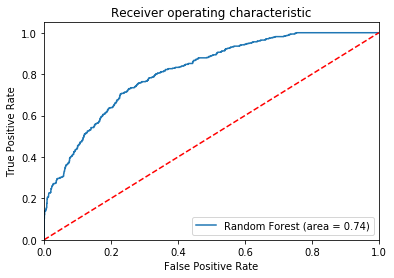

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[1061   68]
 [ 104  374]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.94      0.93      1129
          1       0.85      0.78      0.81       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


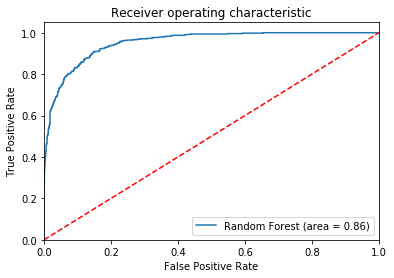

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[1109   20]
 [ 177  301]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.98      0.92      1129
          1       0.94      0.63      0.75       478

avg / total       0.88      0.88      0.87      1607

ROC CURVE


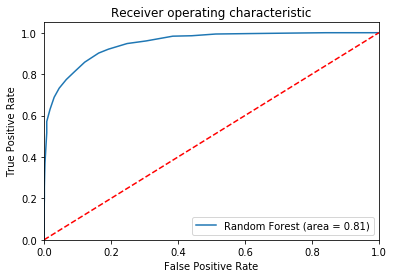

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[1109   20]
 [ 177  301]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.98      0.92      1129
          1       0.94      0.63      0.75       478

avg / total       0.88      0.88      0.87      1607

ROC CURVE


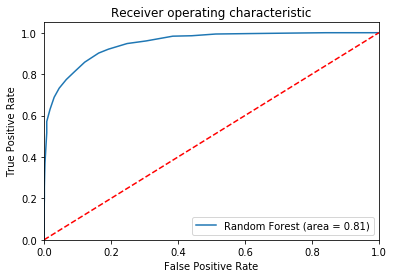

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[1109   20]
 [ 177  301]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.98      0.92      1129
          1       0.94      0.63      0.75       478

avg / total       0.88      0.88      0.87      1607

ROC CURVE


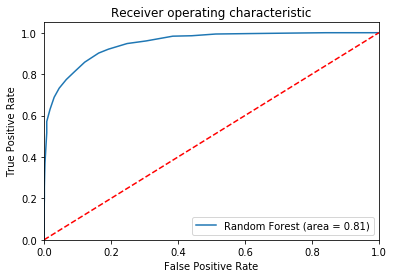

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[1109   20]
 [ 177  301]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.98      0.92      1129
          1       0.94      0.63      0.75       478

avg / total       0.88      0.88      0.87      1607

ROC CURVE


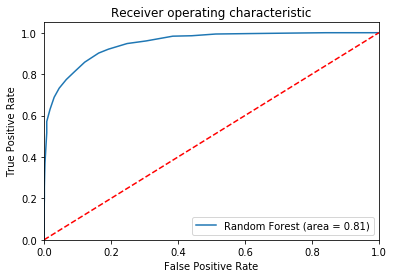

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[932 197]
 [224 254]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      0.83      0.82      1129
          1       0.56      0.53      0.55       478

avg / total       0.73      0.74      0.74      1607

ROC CURVE


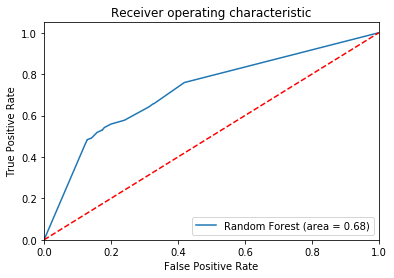

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[1041   88]
 [  97  381]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.92      0.92      1129
          1       0.81      0.80      0.80       478

avg / total       0.88      0.88      0.88      1607

ROC CURVE


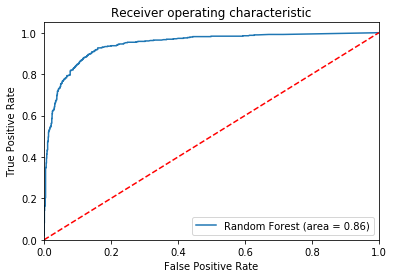

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[1073   56]
 [ 123  355]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.95      0.92      1129
          1       0.86      0.74      0.80       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


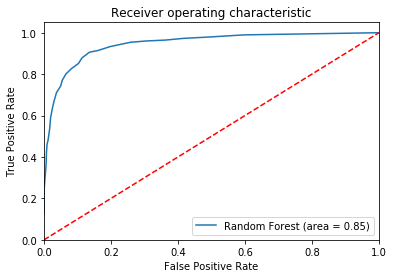

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[1073   56]
 [ 123  355]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.95      0.92      1129
          1       0.86      0.74      0.80       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


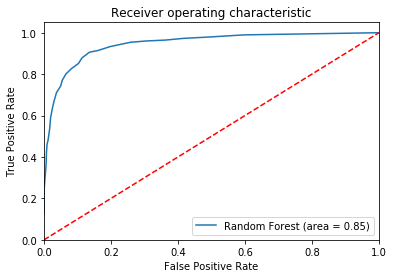

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[1073   56]
 [ 123  355]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.95      0.92      1129
          1       0.86      0.74      0.80       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


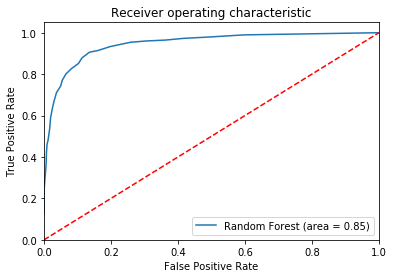

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[1073   56]
 [ 123  355]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.95      0.92      1129
          1       0.86      0.74      0.80       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


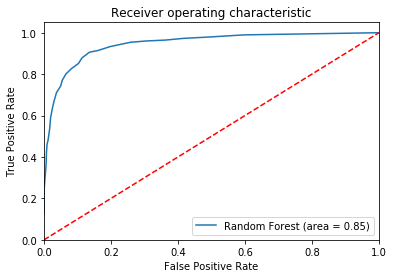

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[856 273]
 [110 368]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.76      0.82      1129
          1       0.57      0.77      0.66       478

avg / total       0.79      0.76      0.77      1607

ROC CURVE


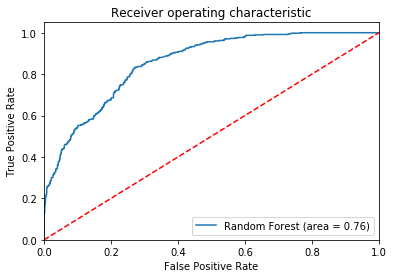

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[1077   52]
 [  94  384]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.95      0.94      1129
          1       0.88      0.80      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


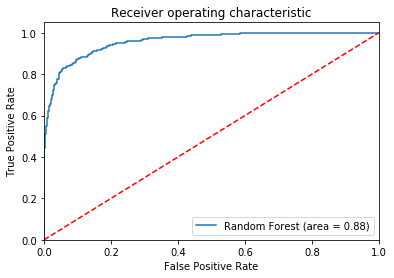

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[1106   23]
 [ 151  327]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.93      0.68      0.79       478

avg / total       0.90      0.89      0.89      1607

ROC CURVE


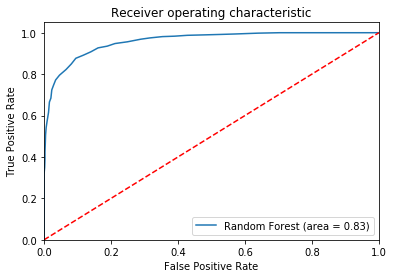

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[1106   23]
 [ 151  327]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.93      0.68      0.79       478

avg / total       0.90      0.89      0.89      1607

ROC CURVE


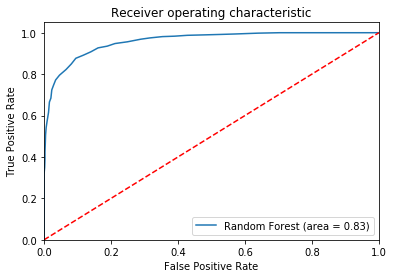

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[1106   23]
 [ 151  327]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.93      0.68      0.79       478

avg / total       0.90      0.89      0.89      1607

ROC CURVE


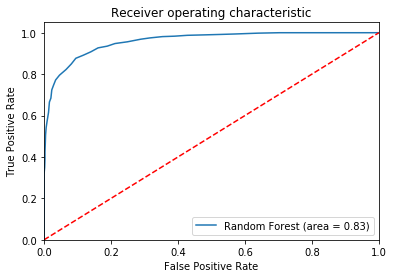

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[1106   23]
 [ 151  327]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.93      0.68      0.79       478

avg / total       0.90      0.89      0.89      1607

ROC CURVE


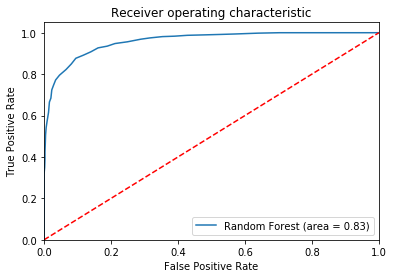

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[856 273]
 [110 368]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.76      0.82      1129
          1       0.57      0.77      0.66       478

avg / total       0.79      0.76      0.77      1607

ROC CURVE


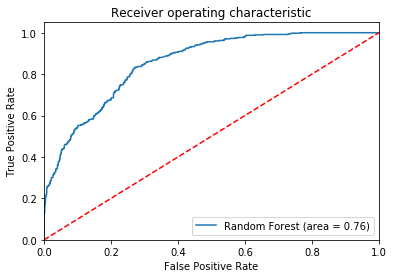

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[1077   52]
 [  94  384]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.95      0.94      1129
          1       0.88      0.80      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


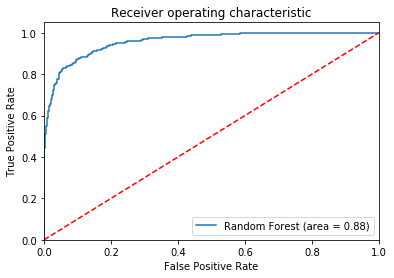

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[1106   23]
 [ 151  327]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.93      0.68      0.79       478

avg / total       0.90      0.89      0.89      1607

ROC CURVE


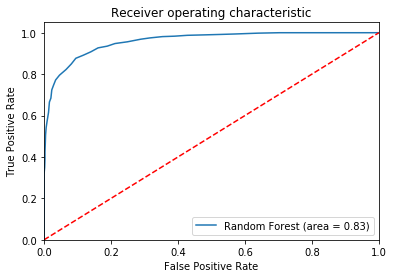

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[1106   23]
 [ 151  327]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.93      0.68      0.79       478

avg / total       0.90      0.89      0.89      1607

ROC CURVE


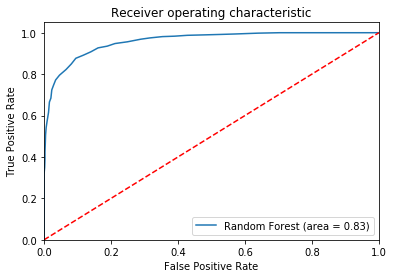

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[1106   23]
 [ 151  327]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.93      0.68      0.79       478

avg / total       0.90      0.89      0.89      1607

ROC CURVE


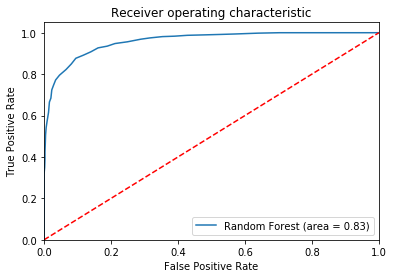

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[1106   23]
 [ 151  327]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.93      0.68      0.79       478

avg / total       0.90      0.89      0.89      1607

ROC CURVE


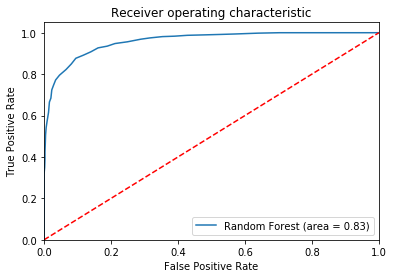

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[850 279]
 [124 354]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      0.75      0.81      1129
          1       0.56      0.74      0.64       478

avg / total       0.78      0.75      0.76      1607

ROC CURVE


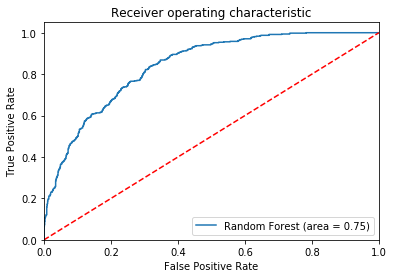

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[1076   53]
 [  95  383]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.95      0.94      1129
          1       0.88      0.80      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


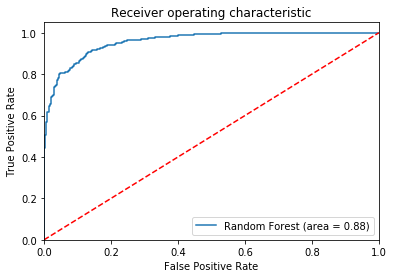

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[1115   14]
 [ 177  301]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.99      0.92      1129
          1       0.96      0.63      0.76       478

avg / total       0.89      0.88      0.87      1607

ROC CURVE


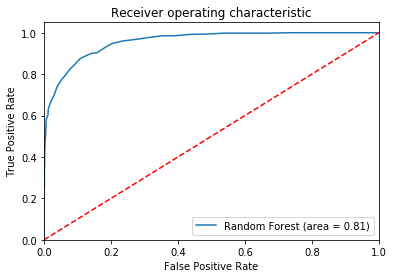

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[1115   14]
 [ 177  301]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.99      0.92      1129
          1       0.96      0.63      0.76       478

avg / total       0.89      0.88      0.87      1607

ROC CURVE


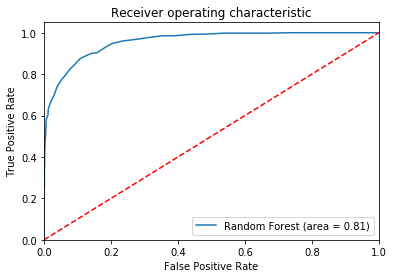

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[1115   14]
 [ 177  301]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.99      0.92      1129
          1       0.96      0.63      0.76       478

avg / total       0.89      0.88      0.87      1607

ROC CURVE


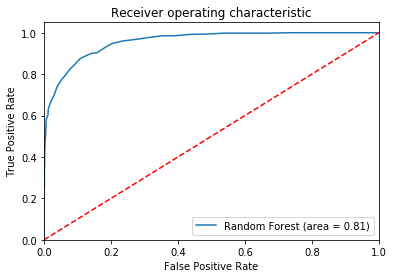

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[1115   14]
 [ 177  301]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.99      0.92      1129
          1       0.96      0.63      0.76       478

avg / total       0.89      0.88      0.87      1607

ROC CURVE


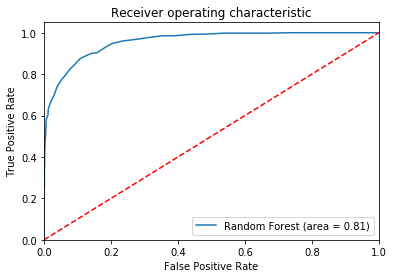

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[904 225]
 [211 267]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      0.80      0.81      1129
          1       0.54      0.56      0.55       478

avg / total       0.73      0.73      0.73      1607

ROC CURVE


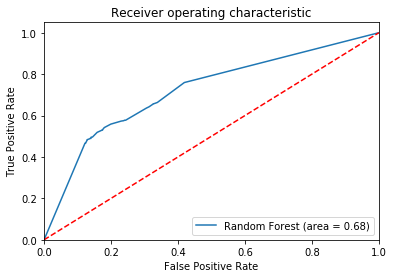

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[1044   85]
 [  90  388]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.92      0.92      1129
          1       0.82      0.81      0.82       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


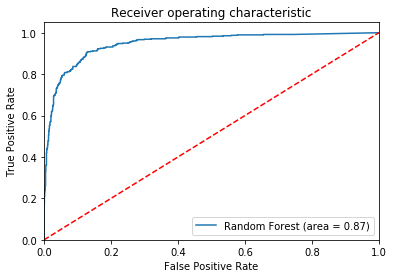

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[1078   51]
 [ 123  355]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.95      0.93      1129
          1       0.87      0.74      0.80       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


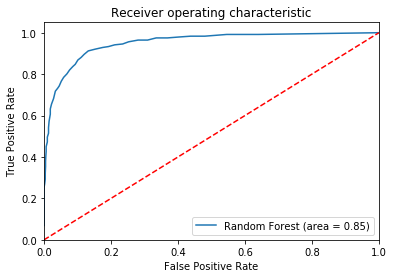

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[1078   51]
 [ 123  355]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.95      0.93      1129
          1       0.87      0.74      0.80       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


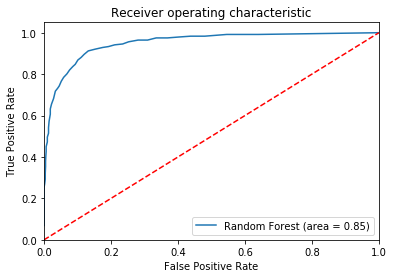

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[1078   51]
 [ 123  355]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.95      0.93      1129
          1       0.87      0.74      0.80       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


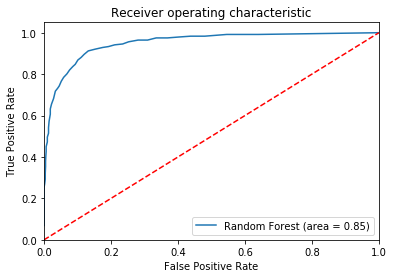

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[1078   51]
 [ 123  355]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.95      0.93      1129
          1       0.87      0.74      0.80       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


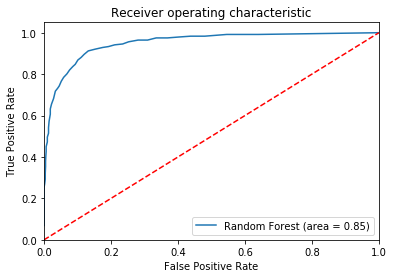

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[842 287]
 [103 375]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.75      0.81      1129
          1       0.57      0.78      0.66       478

avg / total       0.79      0.76      0.77      1607

ROC CURVE


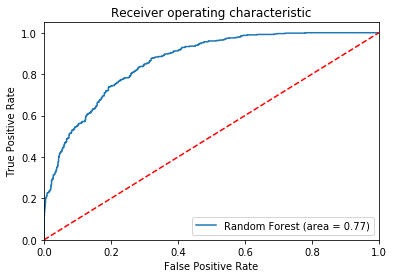

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[1072   57]
 [  97  381]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.95      0.93      1129
          1       0.87      0.80      0.83       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


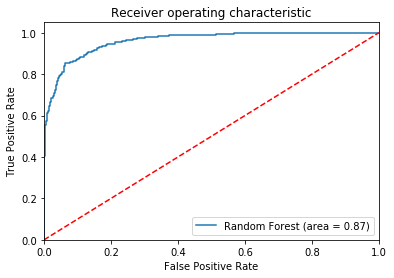

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[1107   22]
 [ 148  330]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.94      0.69      0.80       478

avg / total       0.90      0.89      0.89      1607

ROC CURVE


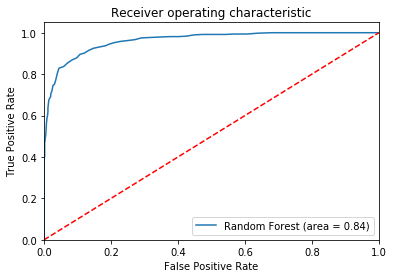

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[1107   22]
 [ 148  330]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.94      0.69      0.80       478

avg / total       0.90      0.89      0.89      1607

ROC CURVE


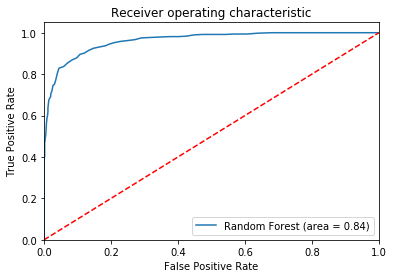

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[1107   22]
 [ 148  330]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.94      0.69      0.80       478

avg / total       0.90      0.89      0.89      1607

ROC CURVE


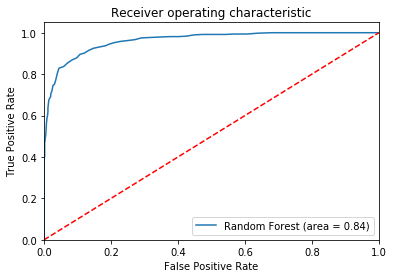

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[1107   22]
 [ 148  330]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.94      0.69      0.80       478

avg / total       0.90      0.89      0.89      1607

ROC CURVE


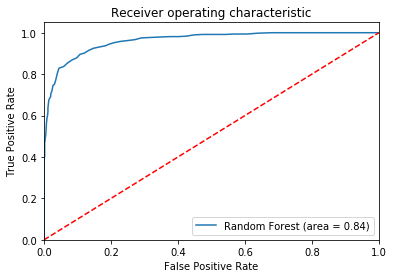

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[842 287]
 [103 375]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.75      0.81      1129
          1       0.57      0.78      0.66       478

avg / total       0.79      0.76      0.77      1607

ROC CURVE


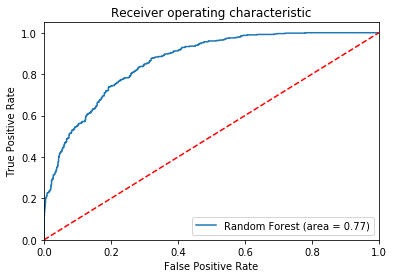

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[1072   57]
 [  97  381]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.95      0.93      1129
          1       0.87      0.80      0.83       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


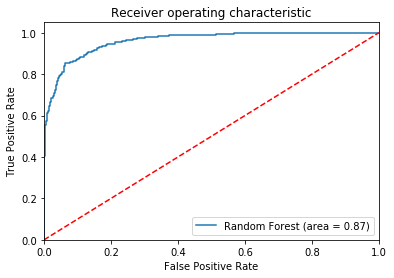

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[1107   22]
 [ 148  330]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.94      0.69      0.80       478

avg / total       0.90      0.89      0.89      1607

ROC CURVE


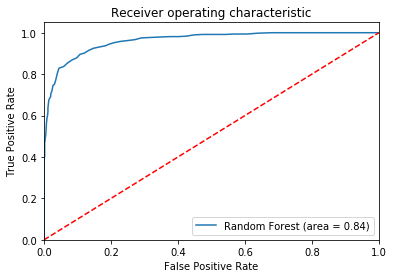

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[1107   22]
 [ 148  330]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.94      0.69      0.80       478

avg / total       0.90      0.89      0.89      1607

ROC CURVE


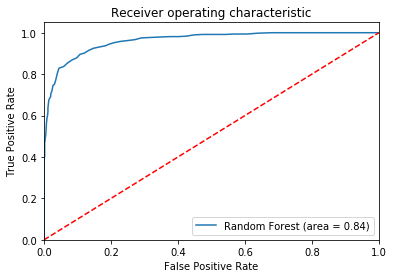

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[1107   22]
 [ 148  330]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.94      0.69      0.80       478

avg / total       0.90      0.89      0.89      1607

ROC CURVE


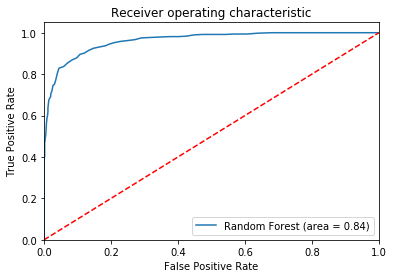

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[1107   22]
 [ 148  330]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.94      0.69      0.80       478

avg / total       0.90      0.89      0.89      1607

ROC CURVE


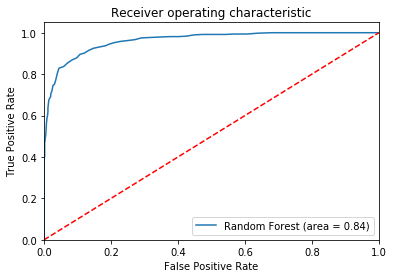

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[858 271]
 [114 364]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.76      0.82      1129
          1       0.57      0.76      0.65       478

avg / total       0.79      0.76      0.77      1607

ROC CURVE


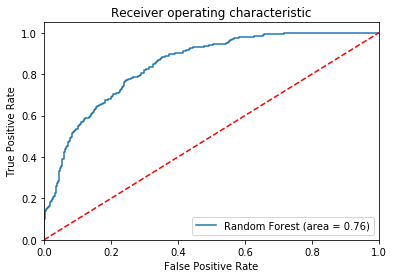

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[1073   56]
 [  98  380]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.95      0.93      1129
          1       0.87      0.79      0.83       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


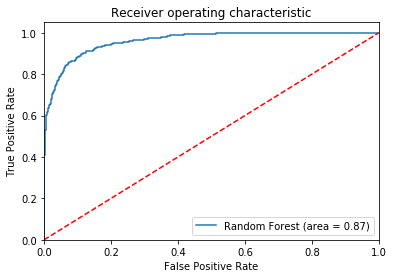

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[1112   17]
 [ 167  311]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      0.98      0.92      1129
          1       0.95      0.65      0.77       478

avg / total       0.89      0.89      0.88      1607

ROC CURVE


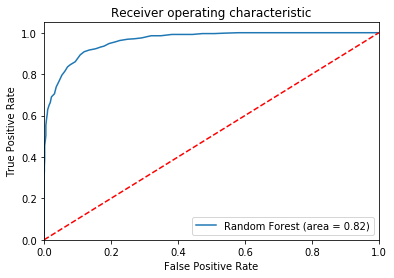

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[1112   17]
 [ 167  311]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      0.98      0.92      1129
          1       0.95      0.65      0.77       478

avg / total       0.89      0.89      0.88      1607

ROC CURVE


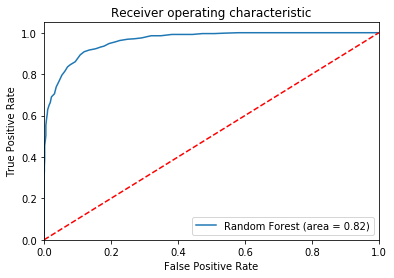

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[1112   17]
 [ 167  311]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      0.98      0.92      1129
          1       0.95      0.65      0.77       478

avg / total       0.89      0.89      0.88      1607

ROC CURVE


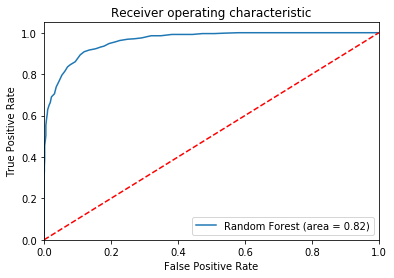

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[1112   17]
 [ 167  311]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      0.98      0.92      1129
          1       0.95      0.65      0.77       478

avg / total       0.89      0.89      0.88      1607

ROC CURVE


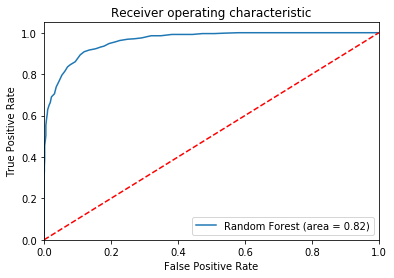

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[930 199]
 [219 259]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      0.82      0.82      1129
          1       0.57      0.54      0.55       478

avg / total       0.74      0.74      0.74      1607

ROC CURVE


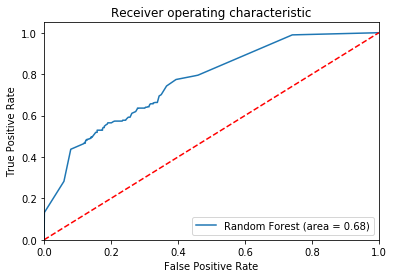

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[1057   72]
 [  91  387]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.94      0.93      1129
          1       0.84      0.81      0.83       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


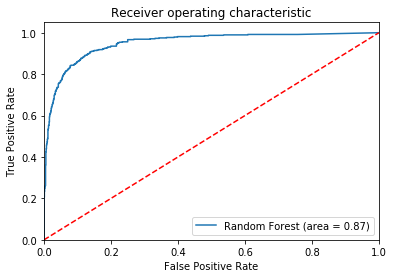

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[1083   46]
 [ 115  363]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.96      0.93      1129
          1       0.89      0.76      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


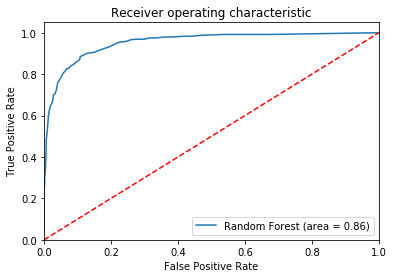

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[1083   46]
 [ 115  363]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.96      0.93      1129
          1       0.89      0.76      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


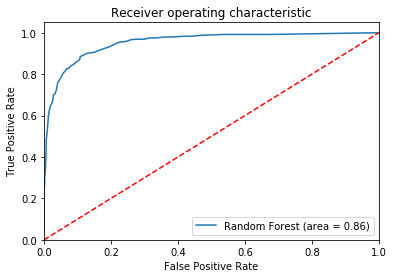

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[1083   46]
 [ 115  363]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.96      0.93      1129
          1       0.89      0.76      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


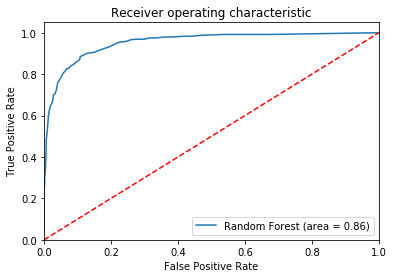

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[1083   46]
 [ 115  363]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.96      0.93      1129
          1       0.89      0.76      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


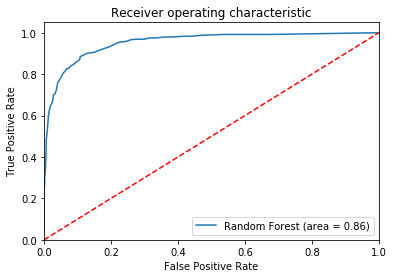

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[868 261]
 [103 375]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.77      0.83      1129
          1       0.59      0.78      0.67       478

avg / total       0.80      0.77      0.78      1607

ROC CURVE


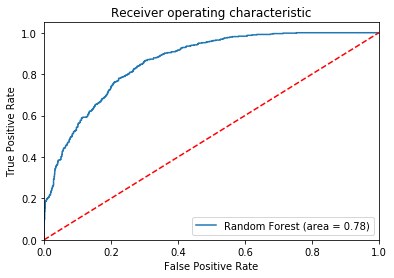

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[1073   56]
 [  97  381]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.95      0.93      1129
          1       0.87      0.80      0.83       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


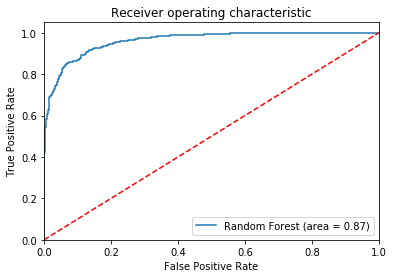

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[1110   19]
 [ 145  333]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.95      0.70      0.80       478

avg / total       0.90      0.90      0.89      1607

ROC CURVE


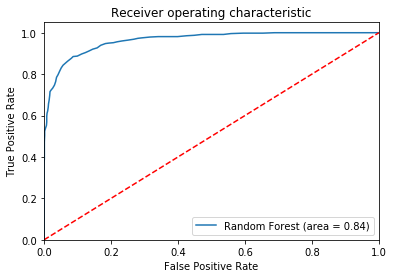

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[1110   19]
 [ 145  333]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.95      0.70      0.80       478

avg / total       0.90      0.90      0.89      1607

ROC CURVE


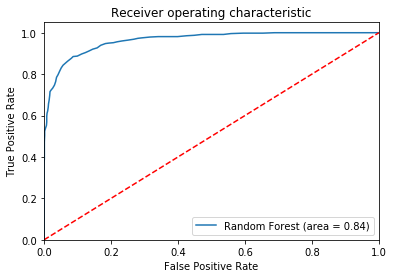

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[1110   19]
 [ 145  333]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.95      0.70      0.80       478

avg / total       0.90      0.90      0.89      1607

ROC CURVE


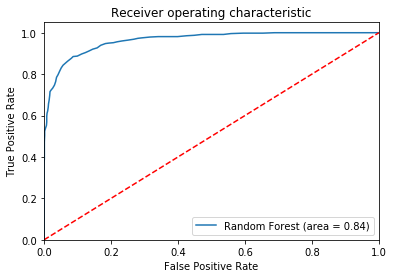

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[1110   19]
 [ 145  333]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.95      0.70      0.80       478

avg / total       0.90      0.90      0.89      1607

ROC CURVE


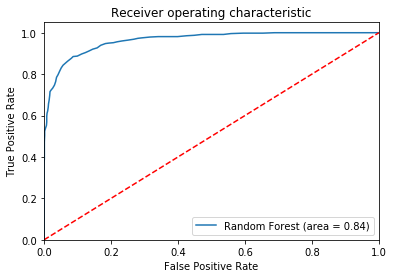

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[868 261]
 [103 375]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.77      0.83      1129
          1       0.59      0.78      0.67       478

avg / total       0.80      0.77      0.78      1607

ROC CURVE


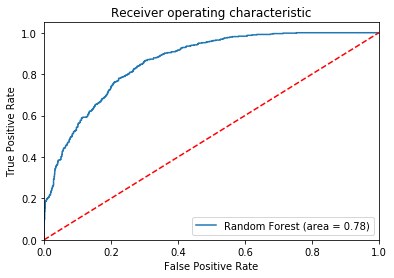

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[1073   56]
 [  97  381]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.95      0.93      1129
          1       0.87      0.80      0.83       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


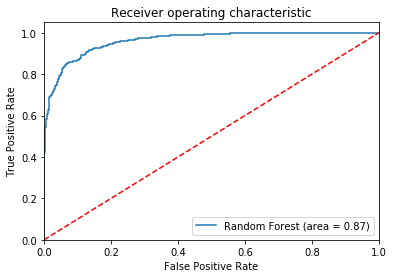

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[1110   19]
 [ 145  333]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.95      0.70      0.80       478

avg / total       0.90      0.90      0.89      1607

ROC CURVE


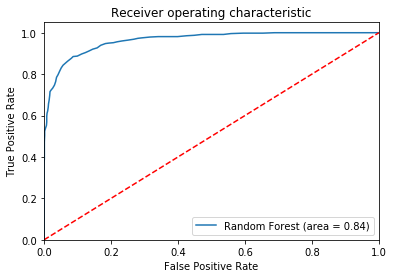

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[1110   19]
 [ 145  333]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.95      0.70      0.80       478

avg / total       0.90      0.90      0.89      1607

ROC CURVE


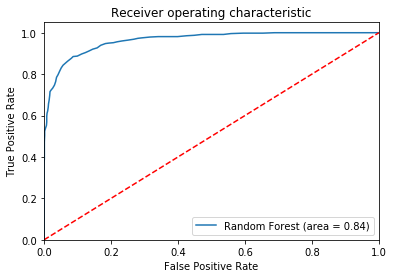

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[1110   19]
 [ 145  333]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.95      0.70      0.80       478

avg / total       0.90      0.90      0.89      1607

ROC CURVE


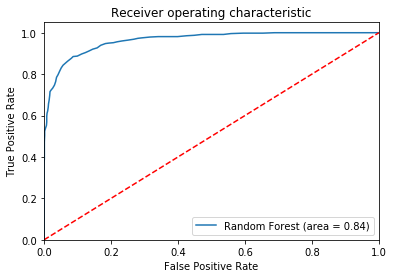

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[1110   19]
 [ 145  333]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.98      0.93      1129
          1       0.95      0.70      0.80       478

avg / total       0.90      0.90      0.89      1607

ROC CURVE


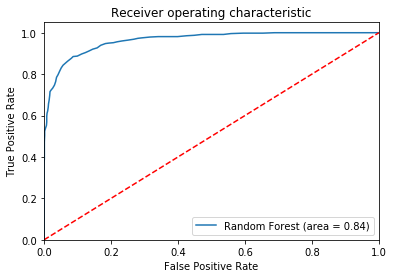

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[865 264]
 [119 359]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.77      0.82      1129
          1       0.58      0.75      0.65       478

avg / total       0.79      0.76      0.77      1607

ROC CURVE


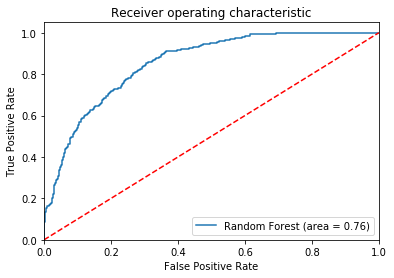

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[1076   53]
 [  95  383]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.95      0.94      1129
          1       0.88      0.80      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


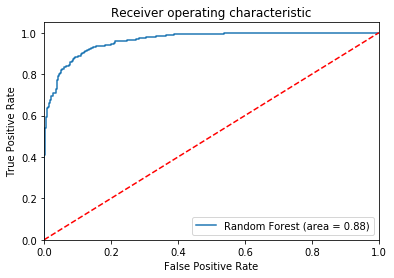

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[1113   16]
 [ 164  314]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      0.99      0.93      1129
          1       0.95      0.66      0.78       478

avg / total       0.90      0.89      0.88      1607

ROC CURVE


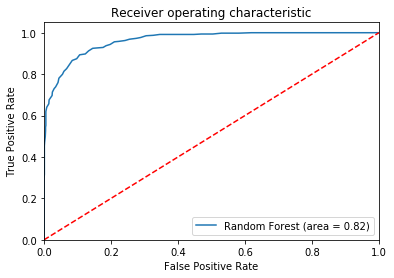

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[1113   16]
 [ 164  314]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      0.99      0.93      1129
          1       0.95      0.66      0.78       478

avg / total       0.90      0.89      0.88      1607

ROC CURVE


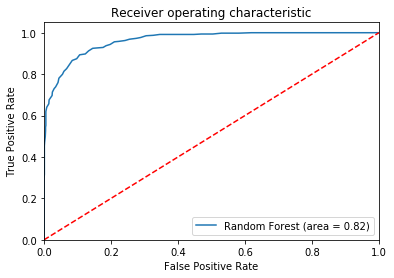

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[1113   16]
 [ 164  314]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      0.99      0.93      1129
          1       0.95      0.66      0.78       478

avg / total       0.90      0.89      0.88      1607

ROC CURVE


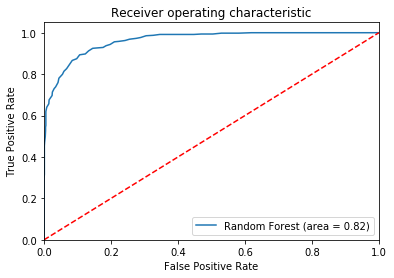

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[1113   16]
 [ 164  314]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      0.99      0.93      1129
          1       0.95      0.66      0.78       478

avg / total       0.90      0.89      0.88      1607

ROC CURVE


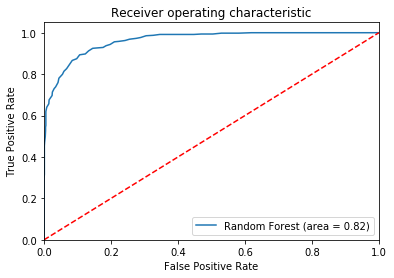

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[926 203]
 [216 262]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      0.82      0.82      1129
          1       0.56      0.55      0.56       478

avg / total       0.74      0.74      0.74      1607

ROC CURVE


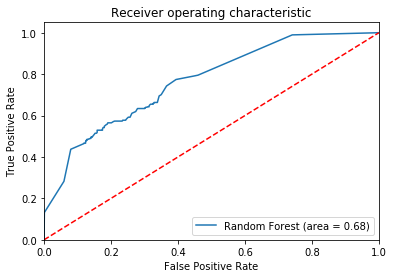

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[1050   79]
 [  89  389]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.93      0.93      1129
          1       0.83      0.81      0.82       478

avg / total       0.89      0.90      0.90      1607

ROC CURVE


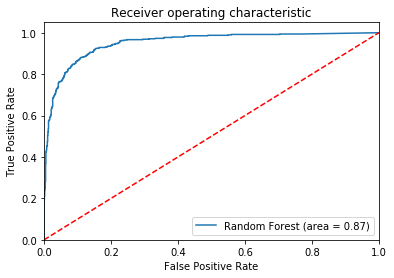

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[1083   46]
 [ 117  361]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.96      0.93      1129
          1       0.89      0.76      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


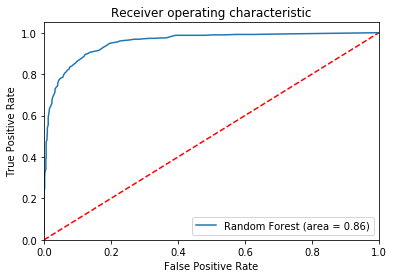

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[1083   46]
 [ 117  361]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.96      0.93      1129
          1       0.89      0.76      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


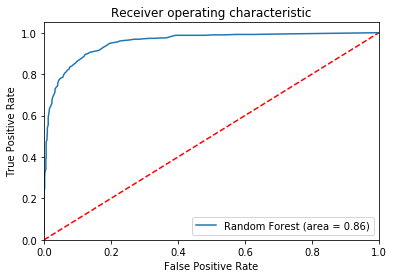

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[1083   46]
 [ 117  361]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.96      0.93      1129
          1       0.89      0.76      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


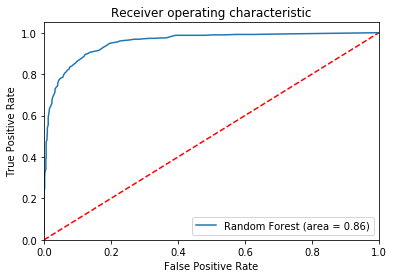

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[1083   46]
 [ 117  361]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.96      0.93      1129
          1       0.89      0.76      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


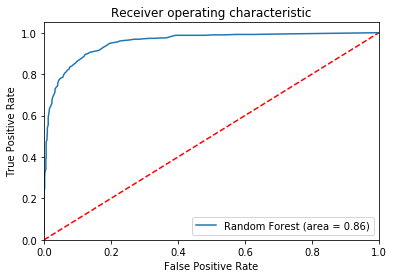

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
Time Elapsed:
268.8660285507194


In [30]:
#Find optimal parameters
start_time = timeit.default_timer()
for i in Estimators:
    for j in maxFeatures:
        for k in maxDepth:
            hyperparameterTuneRandomForest(i,j,k,X_train_selected,y_train,X_validation_selected,y_validation)
elapsed = timeit.default_timer() - start_time
print("Time Elapsed:")
print(elapsed)            

### Random Forest

###### OPTIMAL PARAMETERS
###### Estimators = 50 ----   max features = auto   ---------     Max depth = 10
###### Execution time (268.866 seconds)


# XGBoost  with Cross Validation

In [31]:
#HYPER PARAMETER TUNE
depthMax = [1,2,3,4,5]
learningRate = [0.1,0.05,0.01] 
estimators = [50,100,150,200]

In [32]:
def hyperparameterTuneXGBoost(i,j,k,X_train,y_train,X_test,y_test):

    XGBModel = XGBClassifier(max_depth=i,learning_rate=j, n_estimators=k,random_state=123)
    XGBModel.fit(X_train, y_train)

    y_pred = XGBModel.predict(X_test)

    # evaluate predictions
    print("  Max Depth =" + str(i) + "          Learning Rate =" + str(j) + "         Estimators =" + str(k) )


    print('CONFUSION MATRIX:   ')
    confusion_matrix2 = confusion_matrix(y_test, y_pred)
    print(confusion_matrix2)
    
    print('CLASSIFICATION REPORT:    ')
    print(classification_report(y_test, y_pred))

    print('ROC CURVE')
    logit_roc_auc = roc_auc_score(y_test, XGBModel.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, XGBModel.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    return

  Max Depth =1          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[1099   30]
 [ 270  208]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.97      0.88      1129
          1       0.87      0.44      0.58       478

avg / total       0.82      0.81      0.79      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


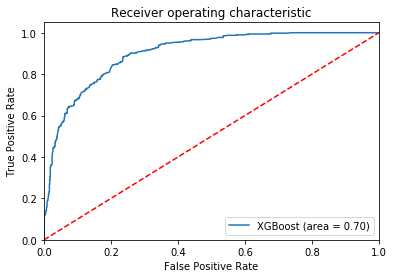

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[1088   41]
 [ 213  265]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.84      0.96      0.90      1129
          1       0.87      0.55      0.68       478

avg / total       0.85      0.84      0.83      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


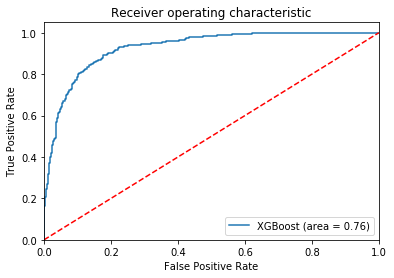

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[1078   51]
 [ 178  300]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.95      0.90      1129
          1       0.85      0.63      0.72       478

avg / total       0.86      0.86      0.85      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


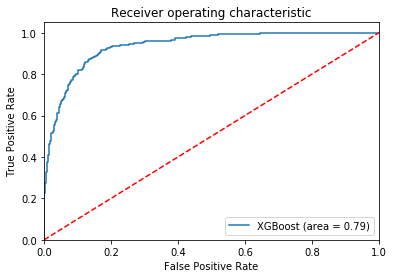

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[1076   53]
 [ 153  325]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.95      0.91      1129
          1       0.86      0.68      0.76       478

avg / total       0.87      0.87      0.87      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


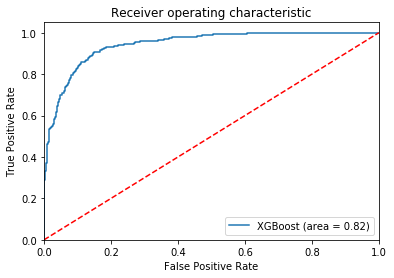

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[1106   23]
 [ 319  159]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.78      0.98      0.87      1129
          1       0.87      0.33      0.48       478

avg / total       0.81      0.79      0.75      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


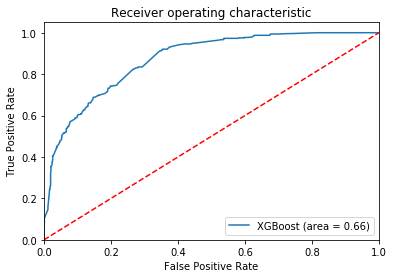

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[1100   29]
 [ 275  203]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.80      0.97      0.88      1129
          1       0.88      0.42      0.57       478

avg / total       0.82      0.81      0.79      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


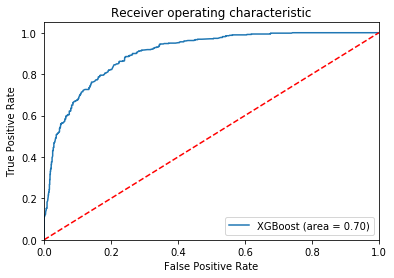

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[1093   36]
 [ 241  237]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.82      0.97      0.89      1129
          1       0.87      0.50      0.63       478

avg / total       0.83      0.83      0.81      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


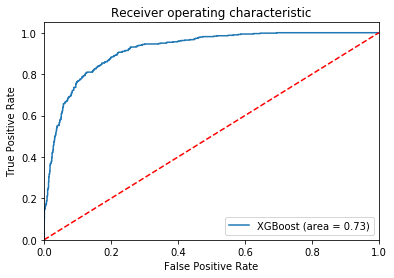

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[1088   41]
 [ 216  262]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.83      0.96      0.89      1129
          1       0.86      0.55      0.67       478

avg / total       0.84      0.84      0.83      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


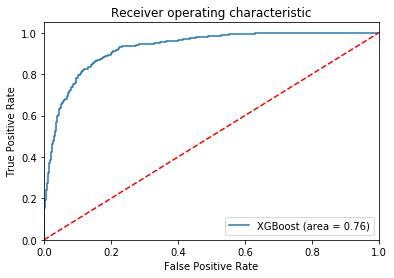

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[1074   55]
 [ 303  175]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.78      0.95      0.86      1129
          1       0.76      0.37      0.49       478

avg / total       0.77      0.78      0.75      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


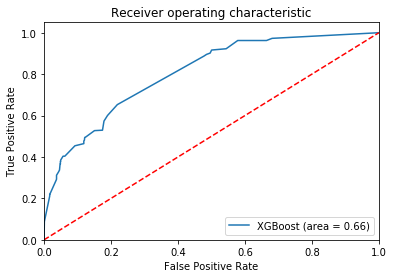

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[1108   21]
 [ 358  120]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.76      0.98      0.85      1129
          1       0.85      0.25      0.39       478

avg / total       0.78      0.76      0.72      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


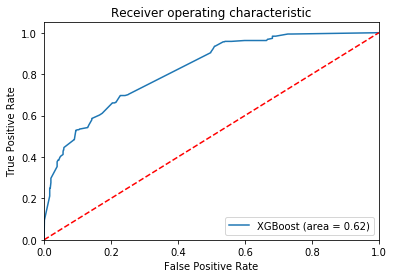

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[1107   22]
 [ 348  130]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.76      0.98      0.86      1129
          1       0.86      0.27      0.41       478

avg / total       0.79      0.77      0.72      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


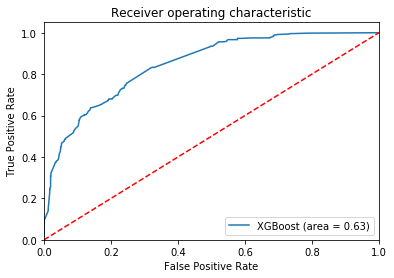

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[1107   22]
 [ 333  145]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.77      0.98      0.86      1129
          1       0.87      0.30      0.45       478

avg / total       0.80      0.78      0.74      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


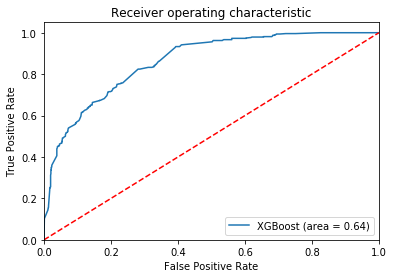

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[1078   51]
 [ 153  325]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.95      0.91      1129
          1       0.86      0.68      0.76       478

avg / total       0.87      0.87      0.87      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


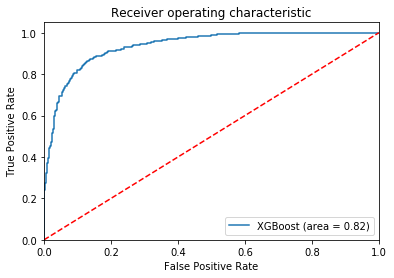

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[1078   51]
 [ 119  359]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.95      0.93      1129
          1       0.88      0.75      0.81       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


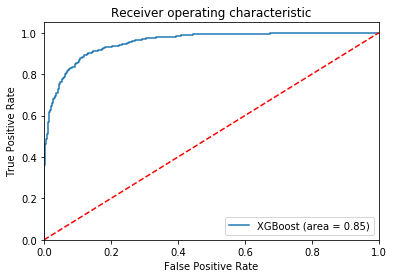

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[1080   49]
 [ 111  367]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.96      0.93      1129
          1       0.88      0.77      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


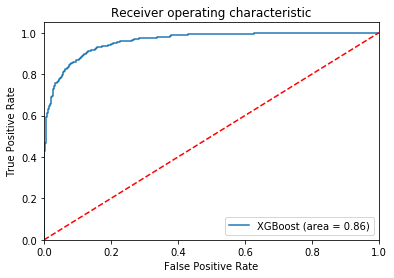

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[1081   48]
 [ 106  372]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.96      0.93      1129
          1       0.89      0.78      0.83       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


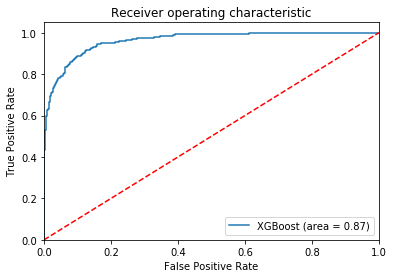

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[1088   41]
 [ 201  277]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.84      0.96      0.90      1129
          1       0.87      0.58      0.70       478

avg / total       0.85      0.85      0.84      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


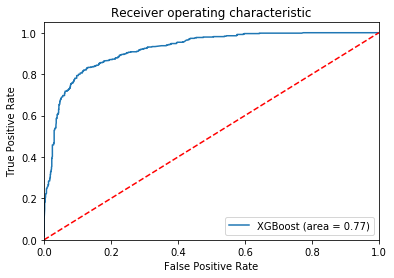

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[1083   46]
 [ 161  317]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      0.96      0.91      1129
          1       0.87      0.66      0.75       478

avg / total       0.87      0.87      0.87      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


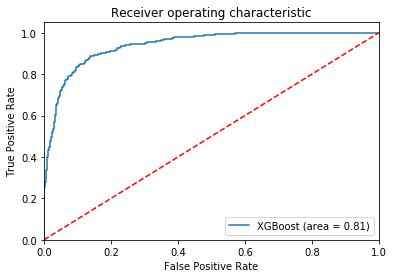

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[1078   51]
 [ 137  341]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.95      0.92      1129
          1       0.87      0.71      0.78       478

avg / total       0.88      0.88      0.88      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


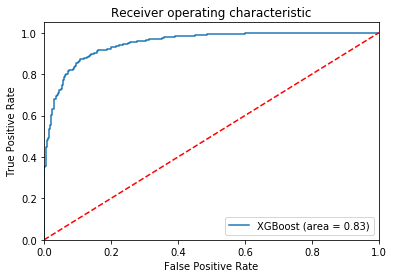

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[1077   52]
 [ 122  356]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.95      0.93      1129
          1       0.87      0.74      0.80       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


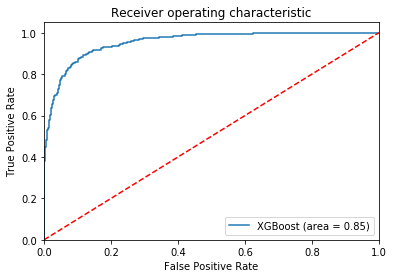

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[1088   41]
 [ 284  194]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.79      0.96      0.87      1129
          1       0.83      0.41      0.54       478

avg / total       0.80      0.80      0.77      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


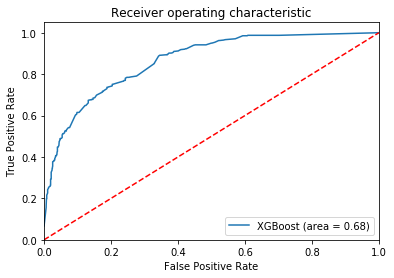

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[1093   36]
 [ 261  217]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      0.97      0.88      1129
          1       0.86      0.45      0.59       478

avg / total       0.82      0.82      0.80      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


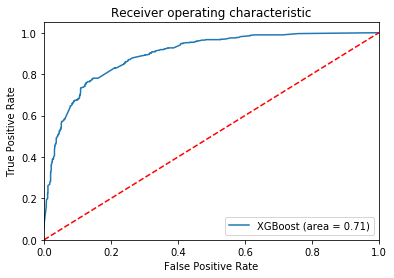

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[1093   36]
 [ 245  233]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.82      0.97      0.89      1129
          1       0.87      0.49      0.62       478

avg / total       0.83      0.83      0.81      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


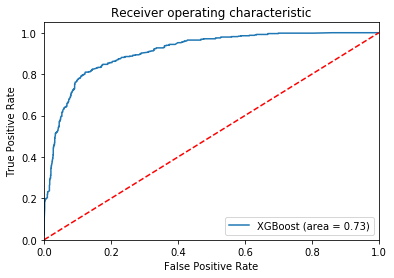

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[1090   39]
 [ 231  247]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.83      0.97      0.89      1129
          1       0.86      0.52      0.65       478

avg / total       0.84      0.83      0.82      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


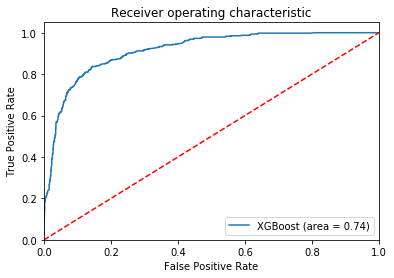

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[1082   47]
 [ 112  366]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.96      0.93      1129
          1       0.89      0.77      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


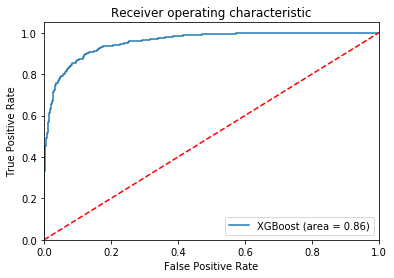

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[1090   39]
 [ 100  378]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.91      0.79      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


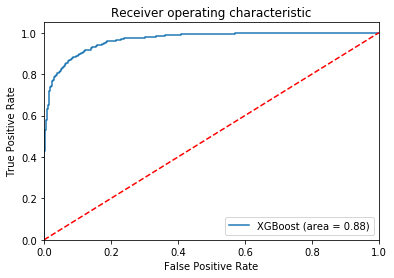

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[1084   45]
 [  98  380]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.89      0.79      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


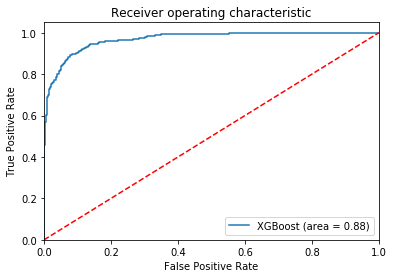

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[1080   49]
 [  95  383]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.89      0.80      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


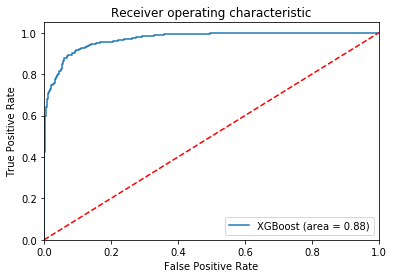

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[1080   49]
 [ 140  338]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.96      0.92      1129
          1       0.87      0.71      0.78       478

avg / total       0.88      0.88      0.88      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


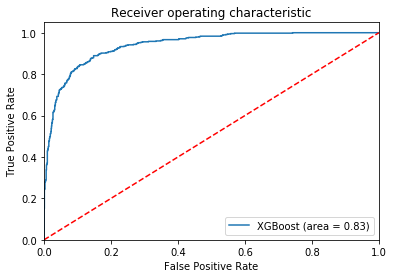

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[1081   48]
 [ 124  354]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.96      0.93      1129
          1       0.88      0.74      0.80       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


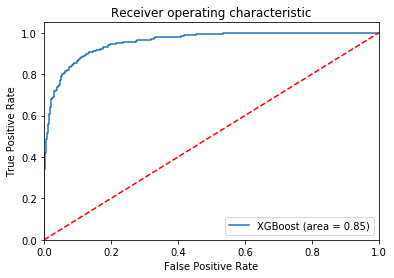

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[1081   48]
 [ 100  378]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.89      0.79      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


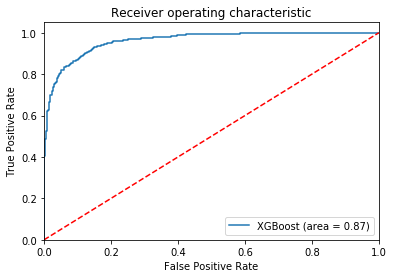

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[1082   47]
 [  99  379]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.89      0.79      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


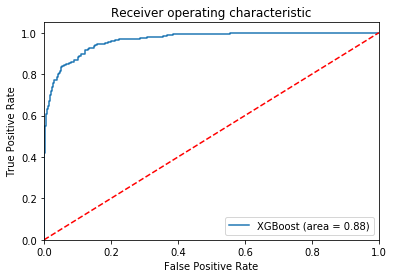

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[1068   61]
 [ 220  258]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.83      0.95      0.88      1129
          1       0.81      0.54      0.65       478

avg / total       0.82      0.83      0.81      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


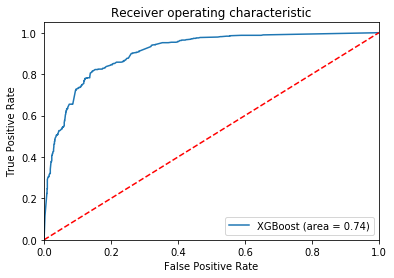

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[1074   55]
 [ 188  290]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.85      0.95      0.90      1129
          1       0.84      0.61      0.70       478

avg / total       0.85      0.85      0.84      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


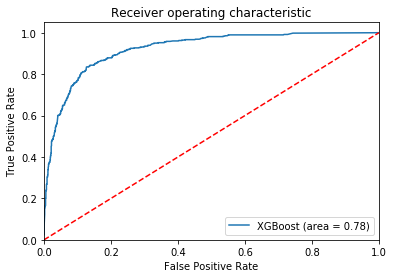

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[1080   49]
 [ 160  318]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      0.96      0.91      1129
          1       0.87      0.67      0.75       478

avg / total       0.87      0.87      0.86      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


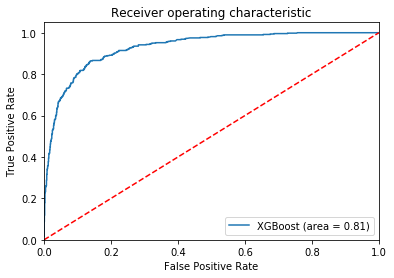

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[1080   49]
 [ 146  332]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.96      0.92      1129
          1       0.87      0.69      0.77       478

avg / total       0.88      0.88      0.87      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


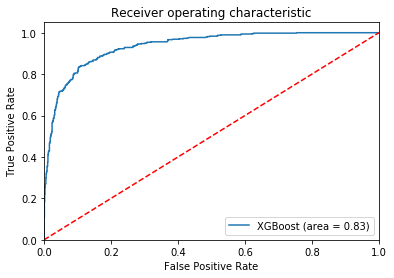

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[1081   48]
 [ 102  376]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.96      0.94      1129
          1       0.89      0.79      0.83       478

avg / total       0.91      0.91      0.90      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


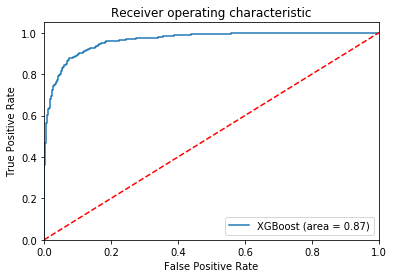

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[1084   45]
 [  92  386]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.90      0.81      0.85       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


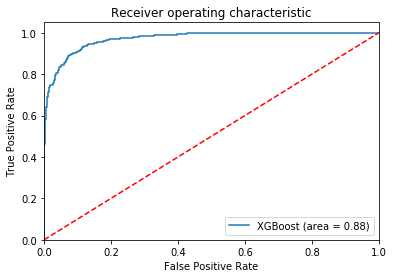

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[1084   45]
 [  90  388]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.90      0.81      0.85       478

avg / total       0.92      0.92      0.91      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


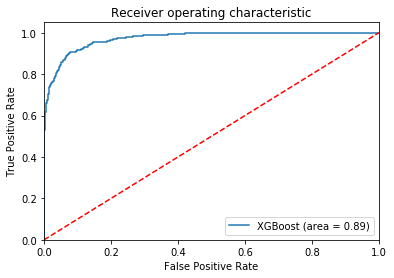

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[1085   44]
 [  89  389]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.90      0.81      0.85       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


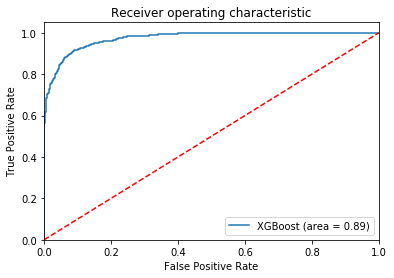

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[1072   57]
 [ 111  367]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.95      0.93      1129
          1       0.87      0.77      0.81       478

avg / total       0.89      0.90      0.89      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


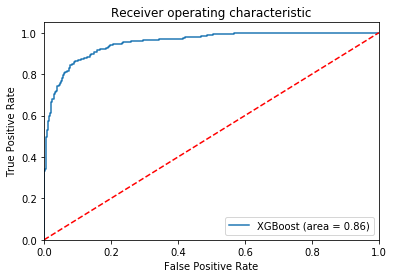

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[1078   51]
 [ 100  378]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.95      0.93      1129
          1       0.88      0.79      0.83       478

avg / total       0.90      0.91      0.90      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


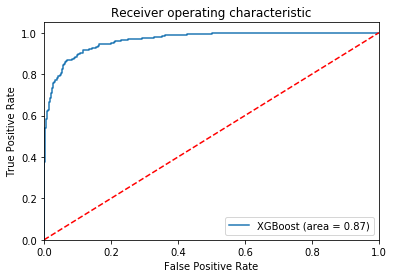

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[1084   45]
 [  95  383]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.89      0.80      0.85       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


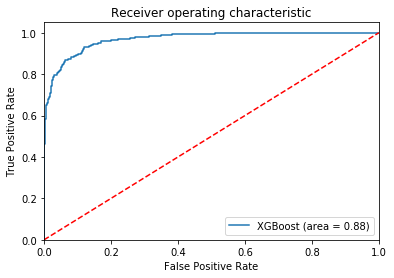

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[1086   43]
 [  90  388]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.90      0.81      0.85       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


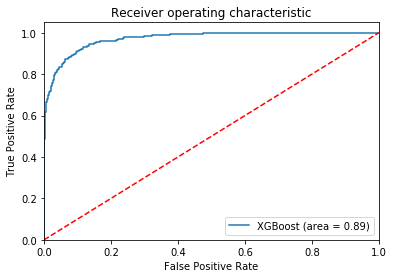

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[1066   63]
 [ 165  313]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      0.94      0.90      1129
          1       0.83      0.65      0.73       478

avg / total       0.86      0.86      0.85      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


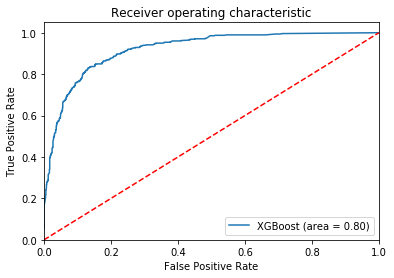

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[1075   54]
 [ 135  343]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.95      0.92      1129
          1       0.86      0.72      0.78       478

avg / total       0.88      0.88      0.88      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


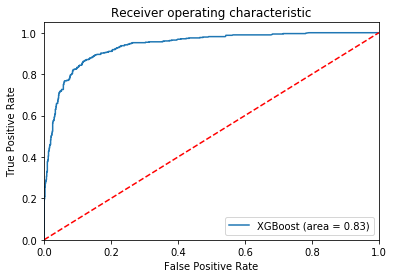

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[1074   55]
 [ 122  356]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.95      0.92      1129
          1       0.87      0.74      0.80       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


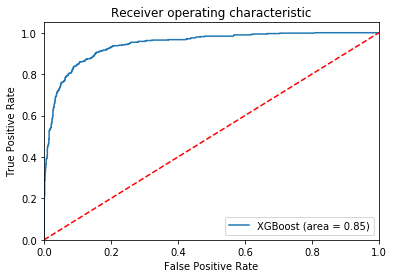

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[1076   53]
 [ 118  360]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.95      0.93      1129
          1       0.87      0.75      0.81       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


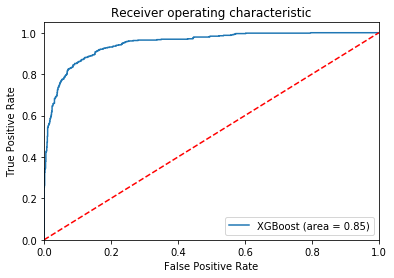

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[1081   48]
 [ 100  378]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.89      0.79      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


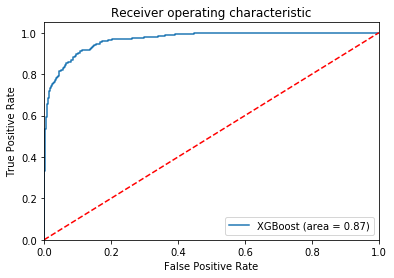

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[1092   37]
 [  95  383]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.91      0.80      0.85       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


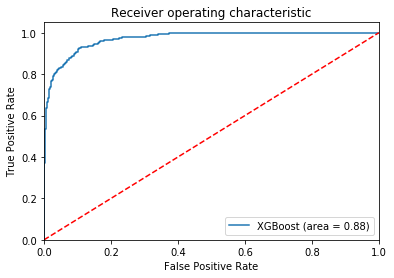

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[1092   37]
 [  90  388]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.91      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


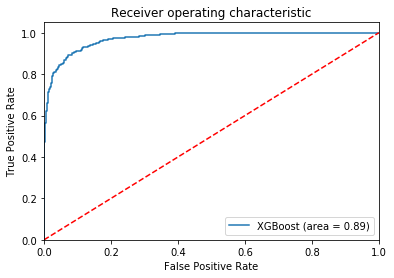

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[1086   43]
 [  85  393]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.96      0.94      1129
          1       0.90      0.82      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


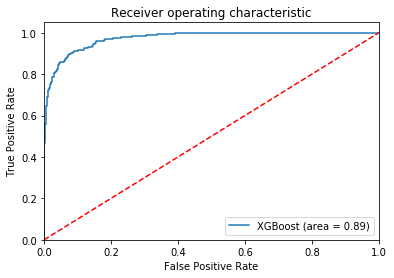

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[1077   52]
 [ 108  370]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.95      0.93      1129
          1       0.88      0.77      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


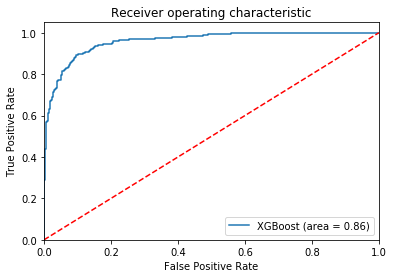

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[1083   46]
 [  92  386]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.89      0.81      0.85       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


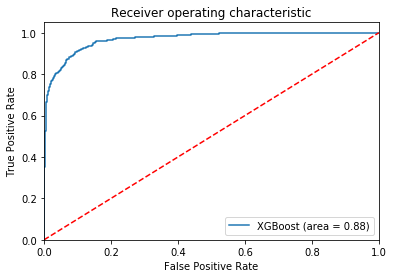

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[1087   42]
 [  90  388]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.90      0.81      0.85       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


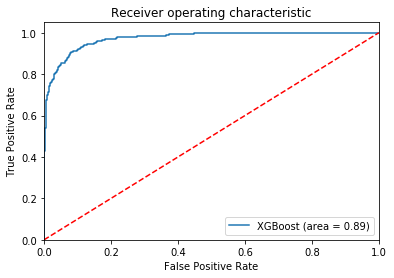

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[1089   40]
 [  89  389]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.91      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


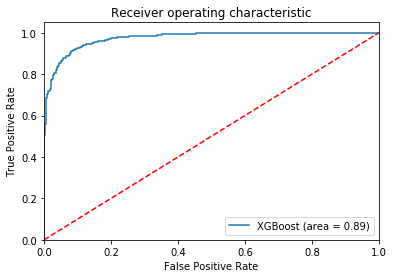

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[1066   63]
 [ 140  338]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.94      0.91      1129
          1       0.84      0.71      0.77       478

avg / total       0.87      0.87      0.87      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


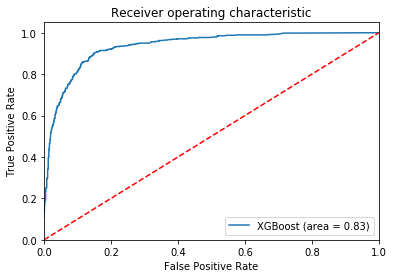

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[1074   55]
 [ 116  362]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.95      0.93      1129
          1       0.87      0.76      0.81       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


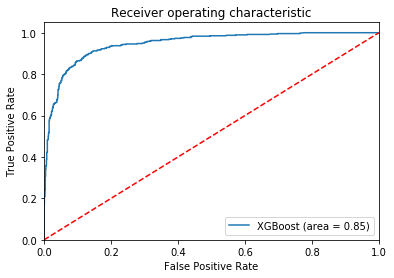

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[1077   52]
 [ 105  373]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.95      0.93      1129
          1       0.88      0.78      0.83       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


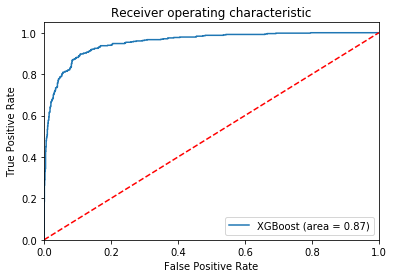

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[1075   54]
 [ 110  368]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.95      0.93      1129
          1       0.87      0.77      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


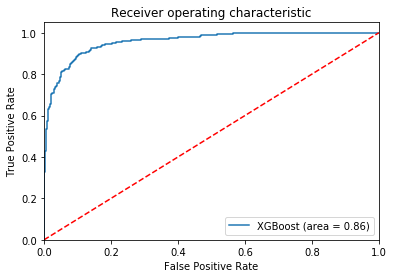

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
Time Elapsed:
135.8111802232035


In [33]:
start_time = timeit.default_timer()
for i in depthMax:
    for j in learningRate:
        for k in estimators:
            hyperparameterTuneXGBoost(i,j,k,X_train_selected,y_train,X_validation_selected,y_validation)
elapsed = timeit.default_timer() - start_time
print("Time Elapsed:")
print(elapsed)  

### XGBOOST

###### OPTIMAL PARAMETERS
###### #Max Depth =3 --------     Learning Rate =0.1    ----------     Estimators =200
###### Execution time 135.811 seconds)


# Test on Unseen Data with optimal hyperparameters

## Logistic Regression

        C =0.5          Maximum Iterations =150
CONFUSION MATRIX:   
[[988 108]
 [ 31 480]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.90      0.93      1096
          1       0.82      0.94      0.87       511

avg / total       0.92      0.91      0.91      1607

ROC CURVE


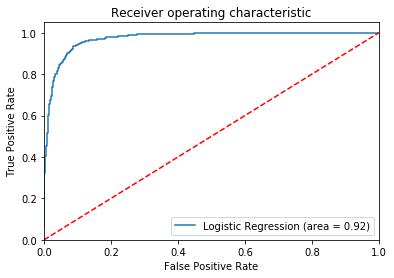

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------


In [34]:
hyperparameterTuneLogistic(0.5,150,X_train_selected,y_train,X_test_selected,y_test)

## Random Forest

  Estimators =50          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[1030   66]
 [  92  419]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.94      0.93      1096
          1       0.86      0.82      0.84       511

avg / total       0.90      0.90      0.90      1607

ROC CURVE


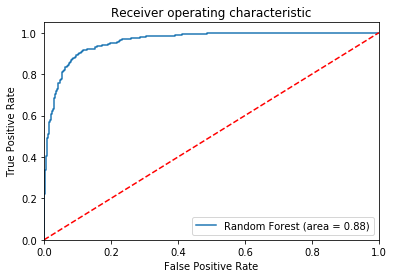

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------


In [38]:
hyperparameterTuneRandomForest(50,'auto',10,X_train_selected,y_train,X_test_selected,y_test)

## XGBoost

  Max Depth =5          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[1048   48]
 [  80  431]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.96      0.94      1096
          1       0.90      0.84      0.87       511

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


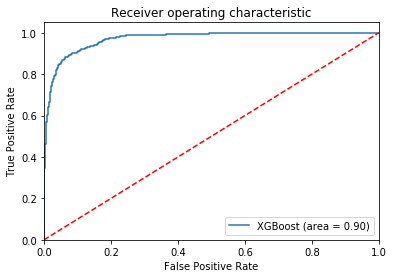

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------


In [39]:
hyperparameterTuneXGBoost(5,0.1,200,X_train_selected,y_train,X_test_selected,y_test)